### Fake Reviews Detector

# Project Overview and Illustration
This project is dedicated to the development and refinement of machine learning models to accurately detect fake reviews on online platforms, thereby enhancing the reliability of digital marketplaces. Our dataset comprises over 40,000 online reviews, each annotated with labels indicating whether the review is genuine or computer-generated. These reviews span various product categories and include ratings and textual feedback. The notebook is structured to guide the reader through the initial motivation for addressing the problem of fake reviews, followed by a detailed description of the data. The exploratory data analysis (EDA) section provides insights into the distribution of categories, ratings, and the nature of review texts, which informs our preprocessing and modeling strategies.

In the modeling section, we describe our approach beginning with a simple logistic regression to establish a performance baseline, then progressing to more complex models like DistilBERT and RNNs, specifically chosen for their efficiency and effectiveness in text analysis. Each model's configuration is explained, including the rationale behind modeling decisions and the processes involved. We evaluate model performance using metrics such as accuracy, precision, recall, and F1 score to iteratively refine our models. Following this, the final models are discussed, highlighting how textual and categorical data were utilized to optimize accuracy and manage computational resources. The notebook aims to not only present the technical details but also to contextualize the analysis and findings within the broader goal of improving trust in online review ecosystems.

![picture](https://drive.google.com/uc?export=view&id=1AeA1zyw5LG3Wx6kka6diMlKW6i2EbHe2)



The illustration above explains the workflow of the notebook. There will be specific model illustrations in Part 3 to describe the models used.

### Table of Contents

1. Problem Statement
2. Visualization and Exploratory Data Analysis
3. Modeling
    *  Baseline Models: implementation and discussion
    *  Final Model: implementation and discussion
4. Results
5. Conclusion / Inferences
6. Future Work and Scope of Improvement


# Part 1: Problem Statement

The central question of our project is: "How can we effectively identify and differentiate fake reviews from genuine ones, leveraging machine learning algorithms, to enhance the reliability and integrity of online review platforms?" This question addresses the critical challenge of distinguishing authentic feedback from deceptive posts that could mislead consumers and harm businesses. By focusing on developing and refining a machine learning model capable of accurately detecting fake reviews, we aim to contribute valuable insights and tools to improve the trustworthiness of online review ecosystems. Our exploration begins with a logistic regression model as a baseline, providing a clear benchmark for evaluating the performance of more complex algorithms in this important task.


# Part 2: EDA

The goal of this section is to perform Exploratory Data Analysis in order to get a better understanding of our data and to inform future pre processing and modeling choices.

## Importing Packages and Loading Data

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# NEW packages
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer, KNNImputer


# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


import os
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install transformers
from transformers import DistilBertTokenizer
import torch
from torch.utils.data import TensorDataset

In [ ]:
from transformers import DistilBertForSequenceClassification, AdamW
from torch.utils.data import DataLoader
import torch.nn.functional as F
import tensorflow as tf

from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Input, Concatenate, Lambda

from tensorflow import keras
from keras.models import Model, Sequential

from keras.callbacks import EarlyStopping


import time
import datetime
from tqdm import tqdm


In [ ]:
# Only for Google Colab — specifies file location.
drive.mount('/gdrive')

Mounted at /gdrive


This project leverages a broad array of powerful Python libraries for data analysis, machine learning, deep learning, natural language processing (NLP), and visualization. Numpy and Pandas are fundamental for numerical operations and structured data manipulation, offering efficient array processing and comprehensive data handling capabilities. The Scikit-learn library supports various machine learning tasks with models like LinearRegression, LogisticRegression, and KNeighborsClassifier, alongside tools for data preprocessing such as StandardScaler and OneHotEncoder, and metrics like accuracy_score, precision_score, recall_score, f1_score, and roc_auc_score for evaluating model performance.

For deep learning and NLP, TensorFlow and Keras provide a framework for constructing and training sophisticated neural network models, including layers like Embedding, LSTM, and Dense. The Transformers library offers access to pre-trained models like DistilBert for advanced NLP tasks, enhancing the model's ability to understand and process textual data.

Matplotlib and Seaborn facilitate high-quality visualizations, helping to uncover trends and patterns in the data. Google Colab integrates seamlessly with Google Drive for data storage and management, and the use of warnings suppresses unnecessary alerts to ensure a smooth workflow. Additional utility libraries like os and tqdm improve file management and provide visual progress indicators during lengthy operations, respectively. This diverse toolkit enables robust data analysis, model training, and result visualization, crucial for delivering insightful and reliable outcomes in this project.

In [ ]:
data_path = '/gdrive/My Drive/CS 109B/CS109B Final Project/Milestone 2'
file_name = 'fake_reviews_dataset.csv'

# Combine the path and filename to get the full path
full_file_path = f'{data_path}/{file_name}'

# Read the CSV file
# df = pd.read_csv('./fake_reviews_dataset.csv')
df = pd.read_csv('/gdrive/My Drive/CS109B Final Project/Milestones/fake_reviews_dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
# Understanding the data
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

print("Data Types: ", df.dtypes)

Number of Rows:  40432
Number of Columns:  4
Data Types:  category     object
rating      float64
label        object
text_        object
dtype: object


The dataset used in this project, fake_reviews_dataset.csv, is sourced from a comprehensive collection of online reviews, containing over 40,000 entries with four key attributes. We downloaded this dataset from Kaggle and it can be found here: https://www.kaggle.com/datasets/mexwell/fake-reviews-dataset.

 The category column identifies the product or service category, while rating provides a numerical assessment ranging from 1 to 5, reflecting the reviewer's opinion. The label column distinguishes between genuine and fake reviews, serving as the target variable for machine learning classification. Lastly, text_ holds the actual review content, which provides valuable features for distinguishing between authentic and deceptive feedback.

We can further inspect the distribution of these variables, starting from the categorical data and then moving on to the numerical variables and text.


## Visualizing Distribution of variables

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64


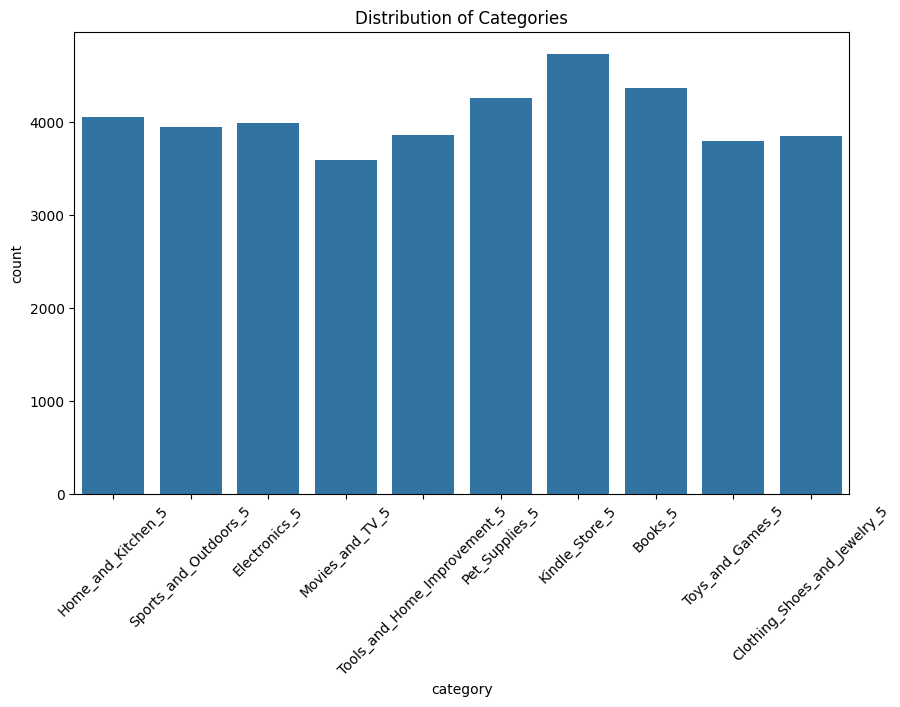

In [ ]:
# For the 'category' column
print(df['category'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()

In our analysis of the "category" column, we observe 10 distinct categories of products and services with reviews. Utilizing a bar chart to visualize the distribution of reviews across these categories reveals a relatively uniform distribution, although with some variation as we see with the Kindle Store  totaling 4,730 reviews while Movies and TV category had 3588 reviews. Because of the relatively even distribution, we do not believe we will run into any issues of overfitting towards a particular category.  

label
CG    20216
OR    20216
Name: count, dtype: int64


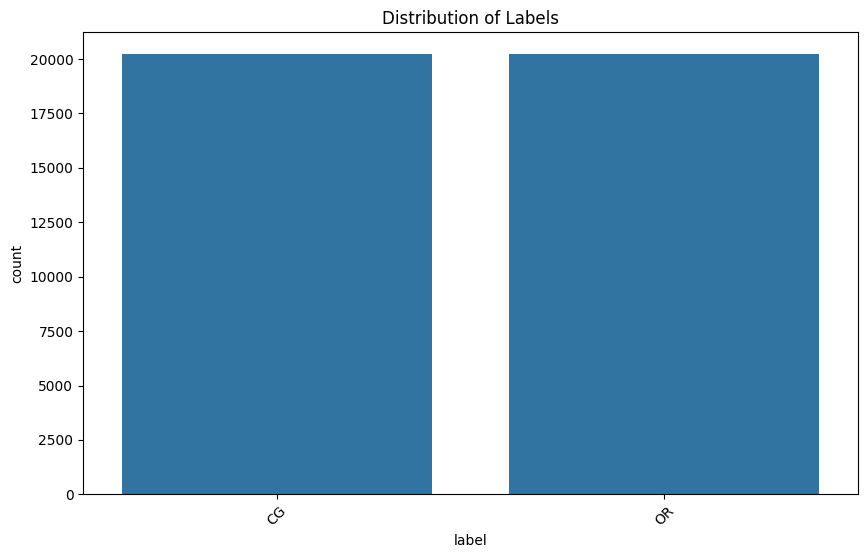

In [ ]:
# For the 'label' column
print(df['label'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xticks(rotation=45)
plt.show()

## Checking Data Imbalance

Looking at the "label" column, we see two catagories: CG (computer generated fake reviews) and OR (Original Reviews - presumably human created and authentic). Both have the exact same number of reviews (20,000) as seen in the bar plot and counts generated above. This suggests no data imbalance techniques are needed for pre-processing.

Overall, with our categorical variables we note that the original reviews and fake reviews are exactly balanced, and we also note a nice balance across all the different review categories.

In [ ]:
total_counts = df['rating'].value_counts()

label_counts = df.groupby('label')['rating'].value_counts().unstack(level=0)

label_counts = label_counts.fillna(0)

label_counts = label_counts.astype(int)

combined_counts = label_counts.join(total_counts.rename('All Data'))

print(combined_counts)

           CG     OR  All Data
rating                        
1.0      1063   1092      2155
2.0       962   1005      1967
3.0      1952   1834      3786
4.0      3920   4045      7965
5.0     12319  12240     24559


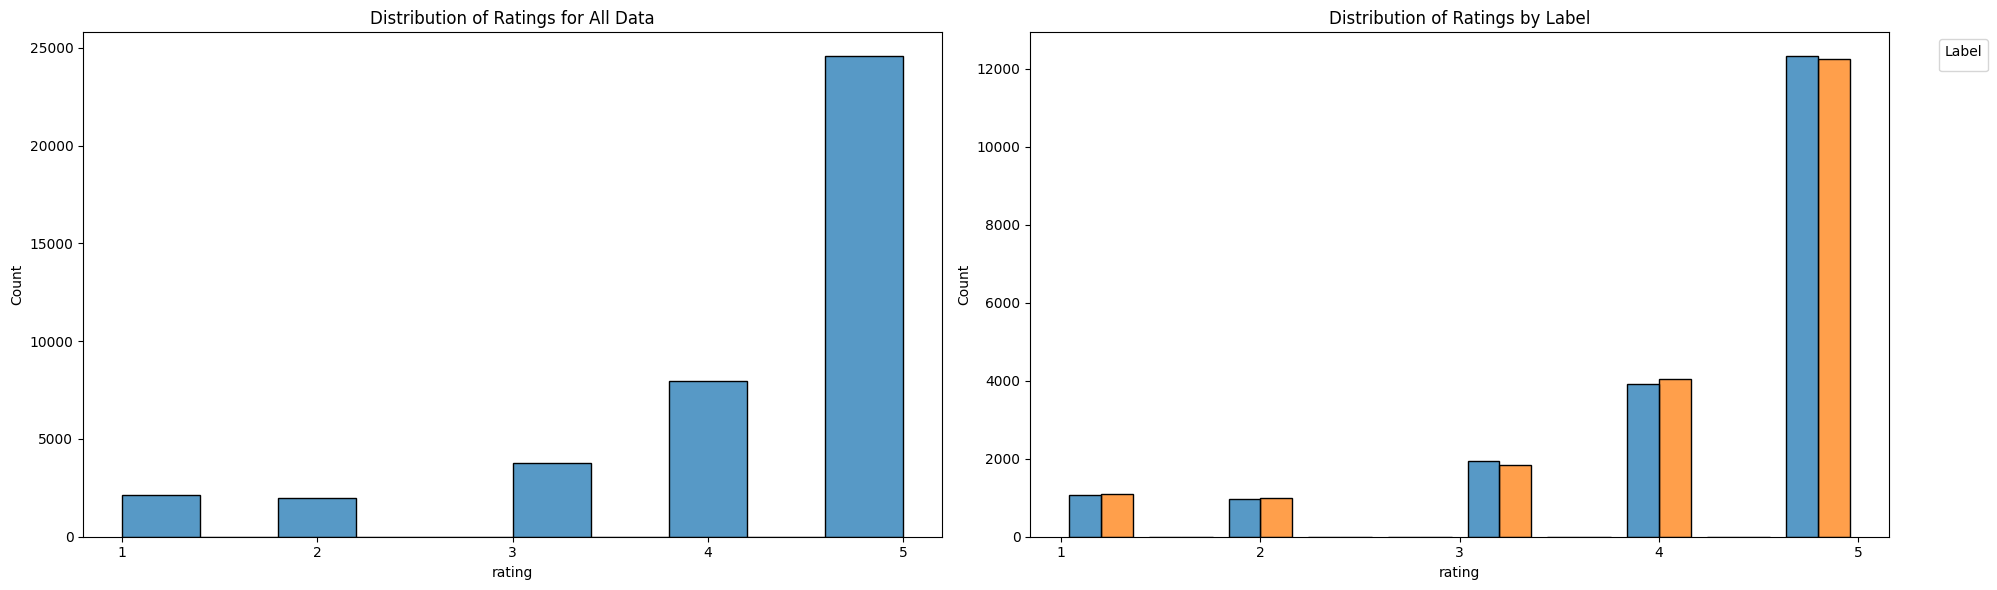

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

sns.histplot(df['rating'], ax=axes[0], binwidth = 0.4)
axes[0].set_title('Distribution of Ratings for All Data')

axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

sns.histplot(data=df, x='rating', hue='label', multiple='dodge', shrink=0.8, ax=axes[1], binwidth=0.4)
axes[1].set_title('Distribution of Ratings by Label')

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels, title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

Now looking at the "Ratings" column, we see that our ratings are numerical, ranging from 1 to 5. By inspecting the distribution of reviews, we note that a stark majority of ratings are on the higher end of the distribution, with a 5.0 rating being the most prominent *followed* by 4.0 and 3.0. This indicates a generally positive attitude in the reviews, and we see the distribution is left skewed. We also plotted the distribution for the reviews depending on whether they were computer generated or original reviews and found the distributions and counts were extremely similar. Because of how similar they are, this shouldn't cause any issues and upon further testing in the future we may omit the variable depending on how much predictive power we find it has.  

## Analyzing distribution of text variable

count    40432.000000
mean       351.271963
std        369.813570
min         24.000000
25%        107.000000
50%        198.000000
75%        439.000000
max       2827.000000
Name: text_length, dtype: float64


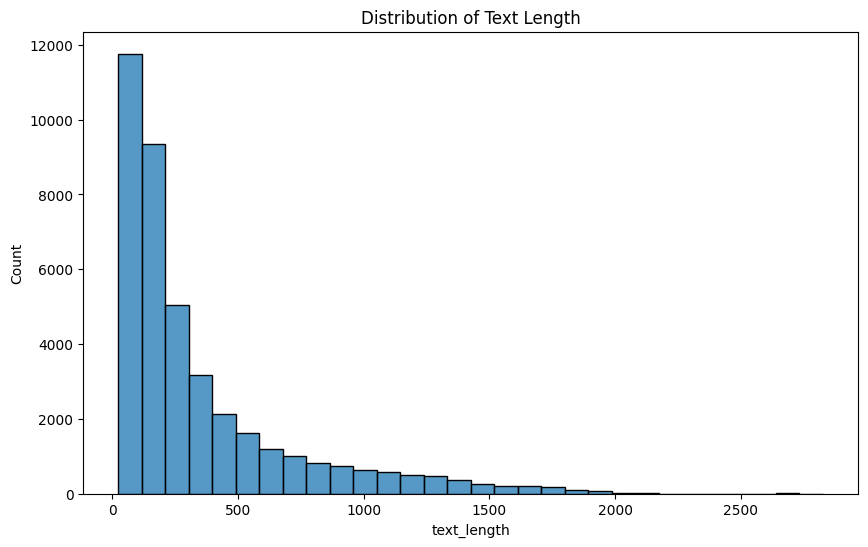

In [ ]:
# Creating a new column to store the length of the text
df['text_length'] = df['text_'].apply(len)

# Summary statistics for text length
print(df['text_length'].describe())

# Histogram for the text length
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30)
plt.title('Distribution of Text Length')
plt.show()


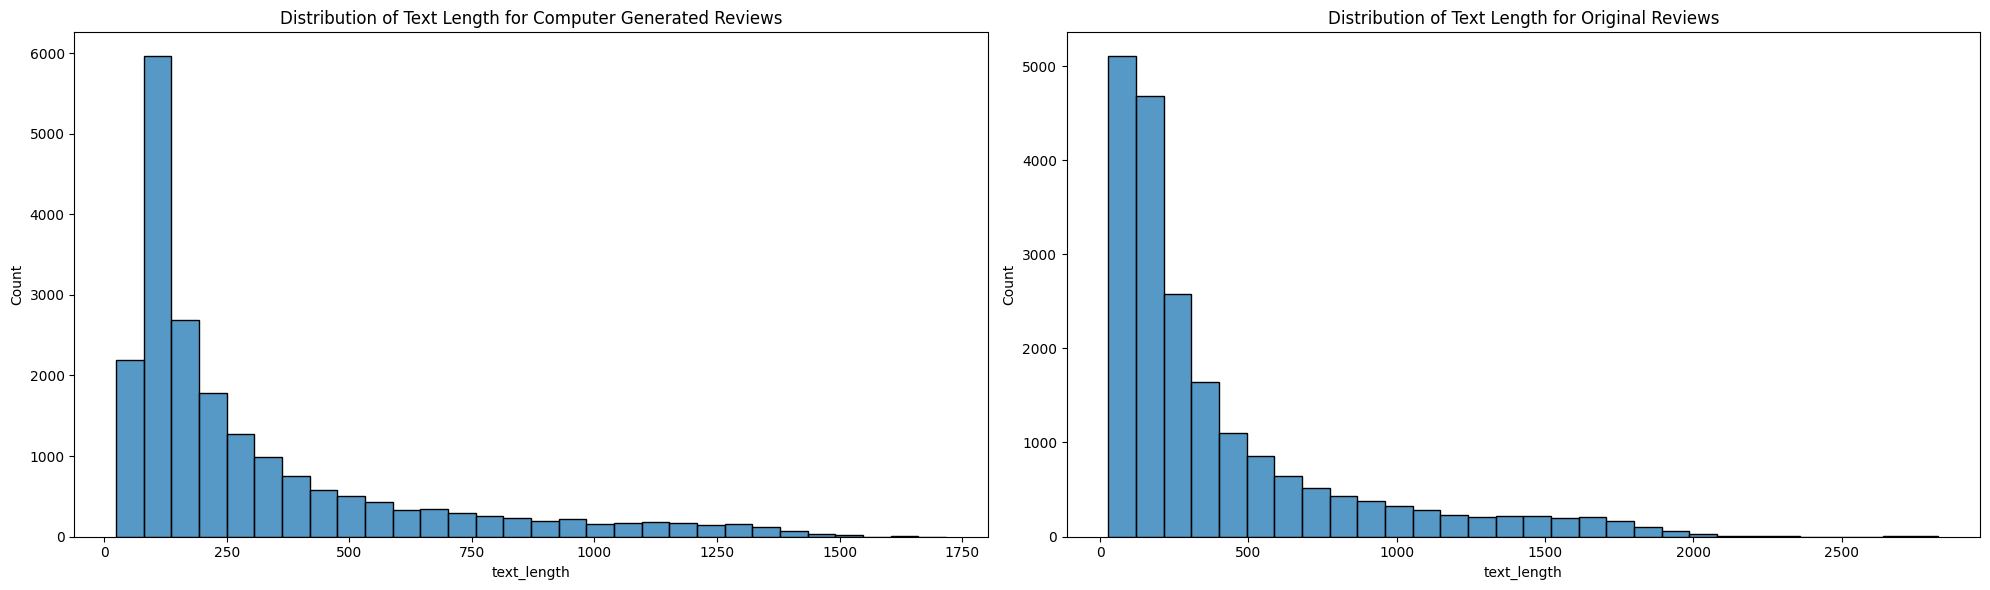

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Histogram for data with label = 'CG'
sns.histplot(df[df['label'] == 'CG']['text_length'], bins=30, ax=axes[0])
axes[0].set_title('Distribution of Text Length for Computer Generated Reviews')

# Histogram for data with label != 'CG'
sns.histplot(df[df['label'] != 'CG']['text_length'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of Text Length for Original Reviews')

plt.tight_layout()  # Adjust the layout to make sure there's no overlap
plt.show()

The "text_" column contains the text of the reviews. We notice that most users prefer to leave short comments over longer ones, as demonstrated by plotting and inspecting the distribution of text length. The tendency towards shorter responses may make identifying fake reviews more difficult as it may be more difficult to create distinctions between the language used in shorter reviews. If we look at the distribution of text length of computer generated reviews vs. original reviews, we see the distribution pattern looks relatively the same with a right-skew. However, the computer generated reviews have much fewer reviews in the bin with the lowest text length.

## Checking for Missingness or Duplicates

In [ ]:
# check for missing values
print("Number of missing values:", df.isnull().sum())

# check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

print("Inspect duplicate rows:")
df[df.duplicated()]

Number of missing values: category       0
rating         0
label          0
text_          0
text_length    0
dtype: int64
Number of duplicate rows: 12
Inspect duplicate rows:


,category,rating,label,text_,text_length
6025,Sports_and_Outdoors_5,5.0,CG,"This is a really good starter kit, with lots o...",152
6708,Sports_and_Outdoors_5,5.0,CG,"Great, no complaints. Comfortable, phone fits ...",274
12548,Movies_and_TV_5,5.0,CG,One of the best movies of the year. Not for e...,82
19802,Pet_Supplies_5,5.0,CG,My dog loves these and it has kept her occupie...,84
20242,Pet_Supplies_5,5.0,CG,My dog loves it and it has kept her occupied f...,81
22305,Pet_Supplies_5,5.0,OR,Got these to give to my 8 mth old chihuahua wh...,338
26444,Kindle_Store_5,5.0,CG,I received this story as an ARC in exchange fo...,297
27233,Kindle_Store_5,5.0,CG,This is the first book in a series by the auth...,509
29203,Books_5,5.0,CG,I really enjoyed this book. The characters wer...,93
33602,Toys_and_Games_5,5.0,CG,I got this for my son for Christmas. He loved...,73


We notice that we have no missing values across any of our columns and we have 12 duplicate rows. We will simply drop the duplicate rows.  

## Preliminary Pre-processing

In [ ]:
# Dropping duplicate rows
df = df.drop_duplicates()

# Resetting the index
df = df.reset_index(drop=True)

# You can print out the shape of the DataFrame to confirm duplicates have been removed
print("Shape of DataFrame after removing duplicates:", df.shape)

Shape of DataFrame after removing duplicates: (40420, 5)


In [ ]:
# One hot encoding for rating
encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'rating' column
rating_encoded = encoder.fit_transform(df[['rating']])
rating_encoded_df = pd.DataFrame(rating_encoded, columns=[f"rating_{i}" for i in range(rating_encoded.shape[1])])

# Concatenate the one hot encoded columns to the original DataFrame
df = pd.concat([df, rating_encoded_df], axis=1)
df.head()

,category,rating,label,text_,text_length,rating_0,rating_1,rating_2,rating_3,rating_4
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75,0.0,0.0,0.0,0.0,1.0
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80,0.0,0.0,0.0,0.0,1.0
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67,0.0,0.0,0.0,0.0,1.0
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81,1.0,0.0,0.0,0.0,0.0
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85,0.0,0.0,0.0,0.0,1.0


One-hot encoding the "rating" variable addresses the subjectivity involved in the review process, where the difference between ratings may not uniformly represent the same perceived difference in quality. For example, the distinction between a 1-star and a 2-star rating could signify a different degree of sentiment compared to the difference between a 4-star and a 5-star rating. By implementing one-hot encoding, we remove the idea of constant increments inferred by our model, treating each rating as a distinct category. Furthermore, since the range of ratings is limited from 1 to 5, the magnitude of these values is already within a manageable scale for most analytical models, therefore we have no need for further scaling.

In [ ]:
# turn label into binary
df['CG'] = (df['label'] == 'CG').astype(int)
#df = df.drop('label', axis=1)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# One-hot encode 'category' column
encoded_categories = encoder.fit_transform(df[['category']])
# Get the names of the new features
category_feature_names = encoder.get_feature_names_out(['category'])


# Convert encoded categories into DataFrames with appropriate column names
encoded_categories_df = pd.DataFrame(encoded_categories, columns=category_feature_names)

# Concatenate the encoded DataFrames back with the original DataFrame (minus the original 'category' column)
df_encoded = pd.concat([df.drop(['category'], axis=1), encoded_categories_df,], axis=1)
df_encoded

,rating,label,text_,text_length,rating_0,rating_1,rating_2,rating_3,rating_4,CG,category_Books_5,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,category_Home_and_Kitchen_5,category_Kindle_Store_5,category_Movies_and_TV_5,category_Pet_Supplies_5,category_Sports_and_Outdoors_5,category_Tools_and_Home_Improvement_5,category_Toys_and_Games_5
0,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,CG,"love it, a great upgrade from the original. I...",80,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,CG,This pillow saved my back. I love the look and...,67,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,CG,"Missing information on how to use it, but it i...",81,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,CG,Very nice set. Good quality. We have had the s...,85,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40415,4.0,OR,I had read some reviews saying that this bra r...,1694,0.0,0.0,0.0,1.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40416,5.0,CG,I wasn't sure exactly what it would be. It is ...,1304,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40417,2.0,OR,"You can wear the hood by itself, wear it with ...",1987,0.0,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40418,1.0,CG,I liked nothing about this dress. The only rea...,1301,1.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We converted the label column into a binary variable called CG. If the observation is computer generated the value with be 1 and 0 otherwise.

We chose to apply one-hot encoding to the category columns to convert these categorical variables into a format that can be efficiently utilized by machine learning algorithms. This encoding process transforms each category value into a new binary column, ensuring that the model can interpret the categorical data correctly without assuming an ordinal relationship between categories.

## Further inspection of text

Finally, let's have a bit closer look at the text column (which, of course, should be our major predictor of whether the review is fake or not). At this stage we want to focus on legitimacy of the text, i.e. that it consists of enlight alphabet letters, punctuation, and maybe some other special symbols (e.g., dollar sign "$" when the reviewer refers to the price of the product).

In the cell below we apply the function "language_check": it retuns True if all the symbols are among expected ones, and return an unexpected symbol otherwise. We further can look at the examples of the "unexpected" symbols.

In [ ]:
def language_check(text):
    for s in text:

      if s in ['.', ',', '!', '?', ' ', "'", '&', '$', '"', '-',
               '\n', '/', ';', ':', ')', '(', '=', '+']:
        continue

      if (s >= 'a' and s <= 'z') or (s >= 'A' and s <= 'Z'):
        continue

      if (s >= '0' and s <= '9'):
        continue

      return s

    return True

df_encoded['language_check'] = df_encoded['text_'].apply(language_check)

In [ ]:
strange_symbols = df_encoded[df_encoded['language_check'] != True][['language_check', 'text_']]

In [ ]:
print(f"pct of entries with strange symbols: {strange_symbols.shape[0] / df.shape[0]}")
strange_symbols.head()

pct of entries with strange symbols: 0.02330529440870856


,language_check,text_
1386,_,Exactly as described! This mat fit our 16x16 a...
1395,_,"These are nice, but not as good as the York de..."
1520,<,"<a data-hook=""product-link-linked"" class=""a-li..."
1529,~,Beautiful bold color. Very soft. Sized perfect...
1539,%,Very nice 100% cotton sheets. I purchase based...


In [ ]:
print(strange_symbols['text_'].iloc[0])
strange_symbols.iloc[0]

Exactly as described! This mat fit our 16x16 artwork perfectly and works wonderfully with this frame:

http://www.amazon.com/gp/product/B0049OAQ48/ref=cm_cr_ryp_prd_ttl_sol_8

Together, both of these products saved us hundreds over custom framing!


language_check                                                    _
text_             Exactly as described! This mat fit our 16x16 a...
Name: 1386, dtype: object

As we can see, even after enlisting many different symbols that would be accepted as "expected", there are still about 2% of entries with unusual symbols. For instance, some of those entries just contain links with slashes or interlineares, as an entree demonstrated above.

These observations imply that a more granual approach for tokenization of the language will be needed. It could be the case that the presense of these special symbols can actually have predictive power for our target.

In [ ]:
strange_symbols.loc[7557]['text_']

'<div id="video-block-RADSZ2O4SKEN1" class="a-section a-spacing-small a-spacing-top-mini video-block"></div><input type="hidden" name="" value="https://images-na.ssl-images-amazon.com/images/I/B1o4pS7r6S.mp4" class="video-url"><input type="hidden" name="" value="https://images-na.ssl-images-amazon.com/images/I/FfS5vS8jQS.png" class="video-slate-img-url">&nbsp;this is a great knife for the money and a great tool.  The knife is made'

## Further Analysis into Fake vs. Real reviews patterns

Rating distribution depending on the category; red : computer generated, blue: original response


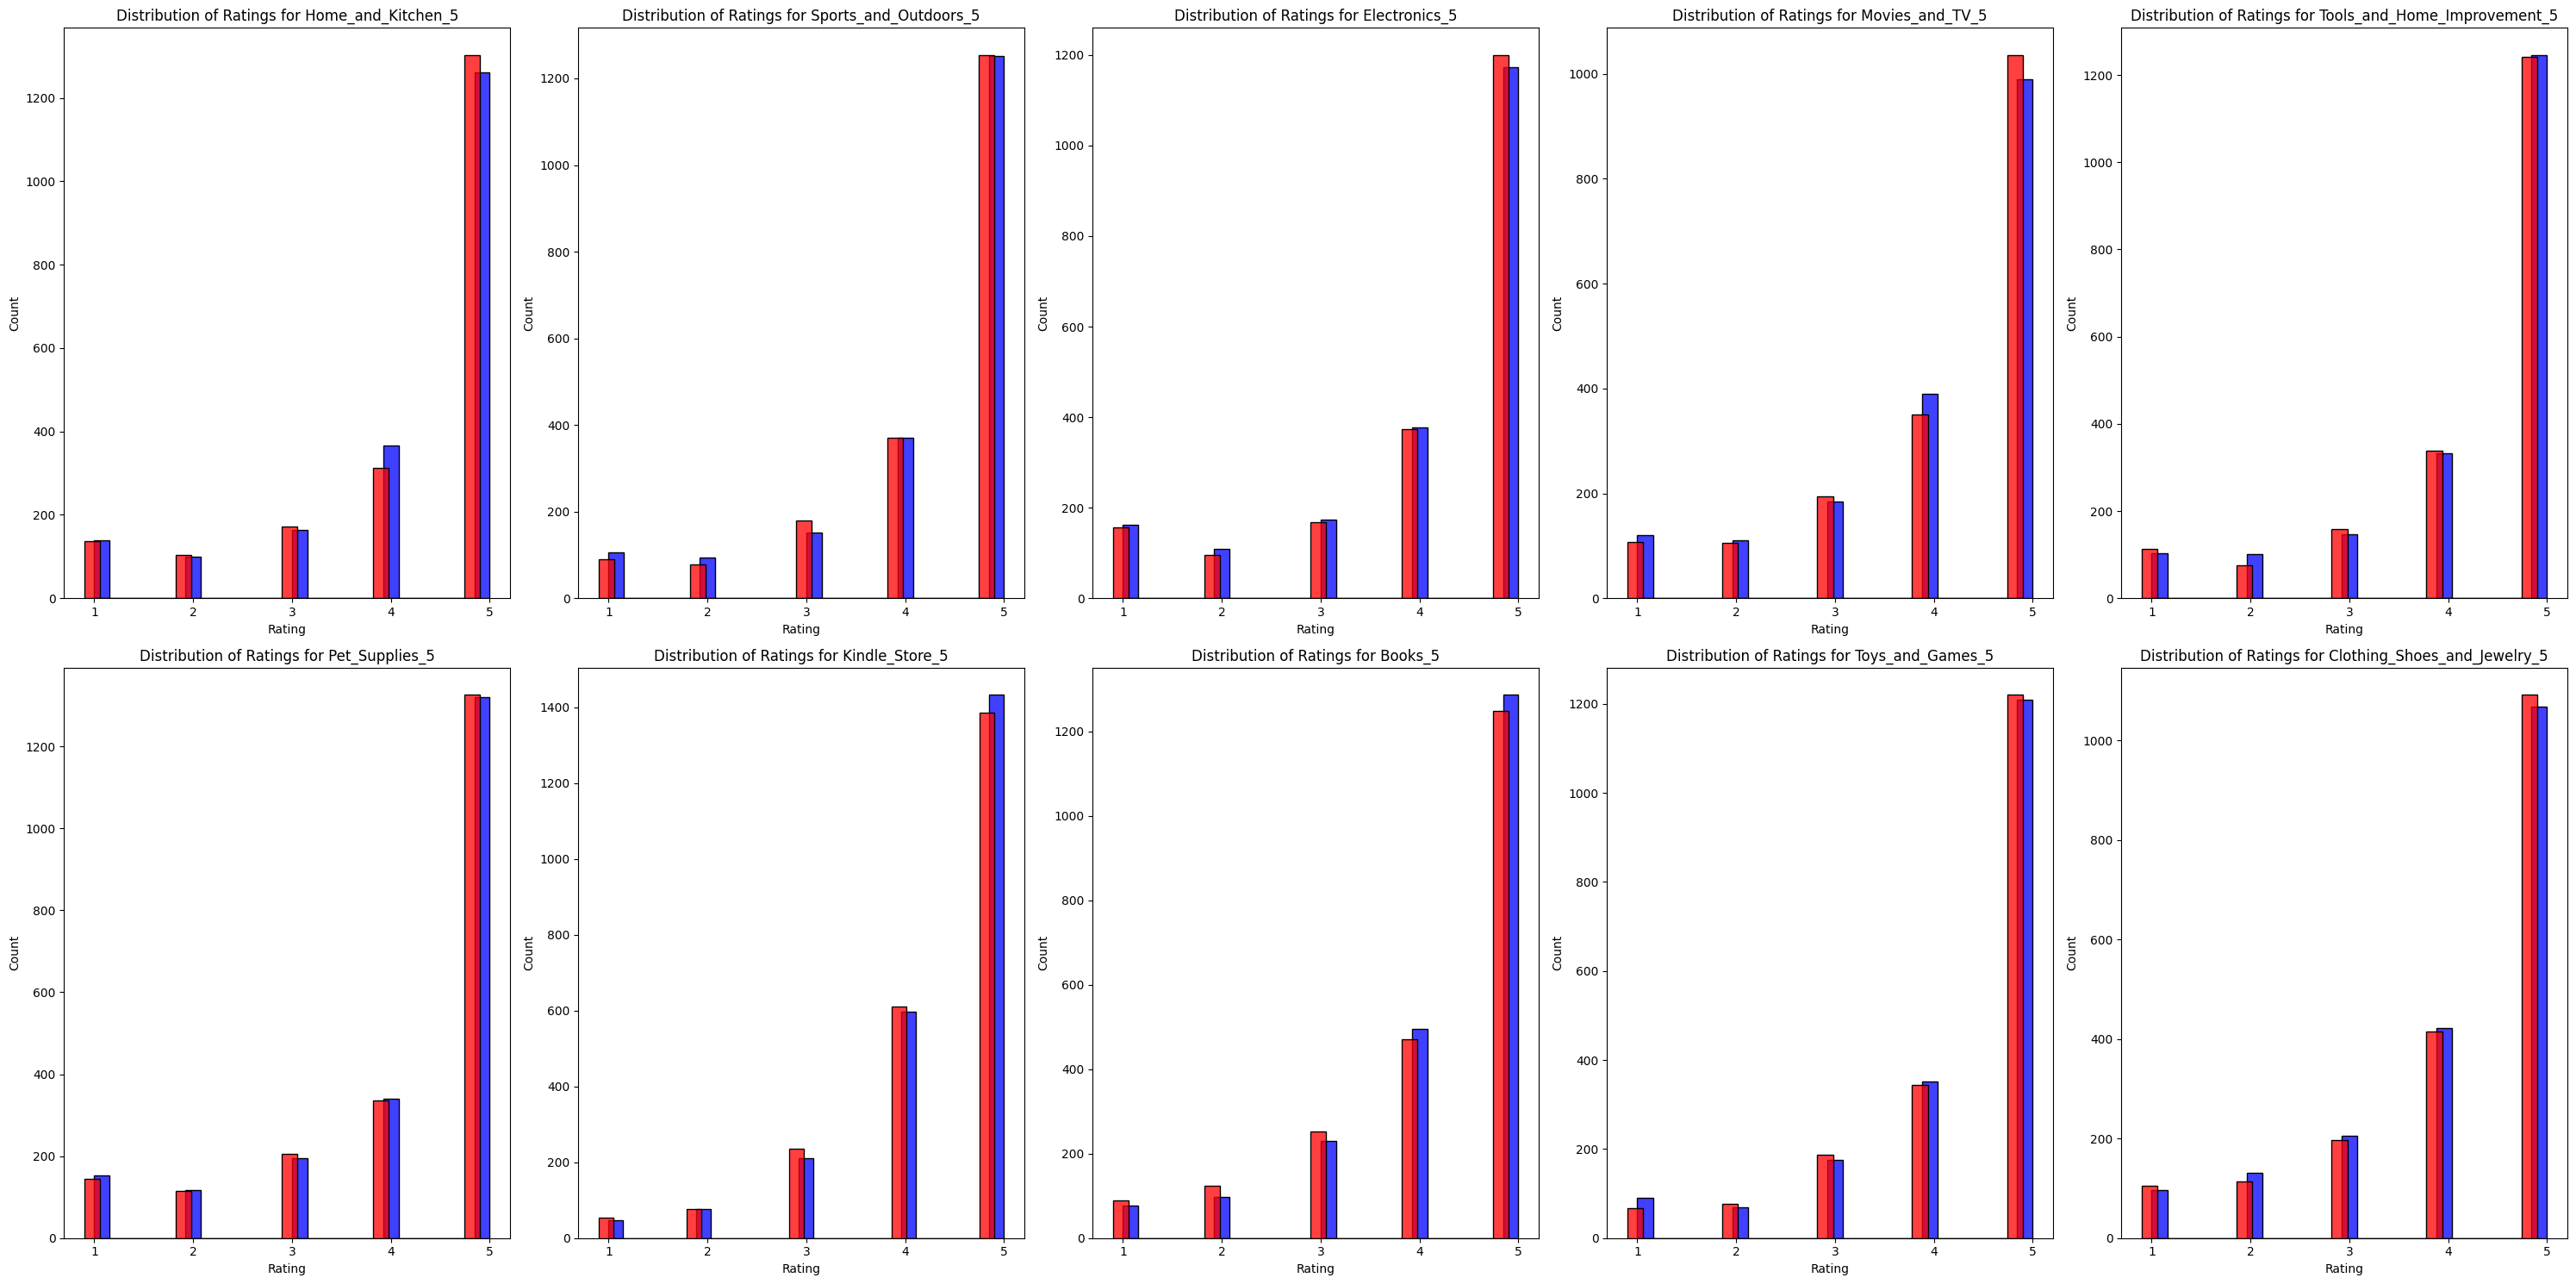

In [ ]:
#ratings by category
print('Rating distribution depending on the category; red : computer generated, blue: original response')

fig, ax = plt.subplots(2, 5, figsize=(30, 15))
for i, category in enumerate(df['category'].unique()):
    sns.histplot(df[(df['category'] == category) & (df['label'] == 'OR')]['rating'], ax=ax[i//5, i%5], color = 'blue')
    sns.histplot(df[(df['category'] == category) & (df['label'] == 'CG')]['rating'] - 0.1, ax=ax[i//5, i%5], color = 'red')
    ax[i//5, i%5].set_title(f'Distribution of Ratings for {category}')
    ax[i//5, i%5].set_xlabel('Rating')
    ax[i//5, i%5].set_ylabel('Count')

plt.tight_layout()
plt.show()

In the graphs above we are looking at the difference in rating distribution between each of the categories. Red histograms represent the counts among computer-generated responses (label "CG"), while the blue ones are for the original responses (label "OR") (note: we subtract "-0.1" from CG's ratings so that histograms do not overlap with each other).

Overall we see that there is very little difference in the rating distribution
either across categories or between different labels within each category:
- Rating of 5 is the most prevalent, followed by 4, and then 3 for each of the respective categories. The only variation we really see is that a few of the categories have more reviews with a rating of 1 than a rating of 2. Otherwise, the distributions are very similar, and we also note that the counts for the number of reviews in each rating category are relatively similar as well.
- Red histograms closely mirror blue ones almost like the dataset was synthetically created to replicate the same distributions within each category.
Such similarity is quite surprising, especially from the perspective of
fake review generators: seemingly, they would want to introduce biases for the original rating distribution in the desired direction (e.g., introduces slightly more of positive review to improve overall rating).

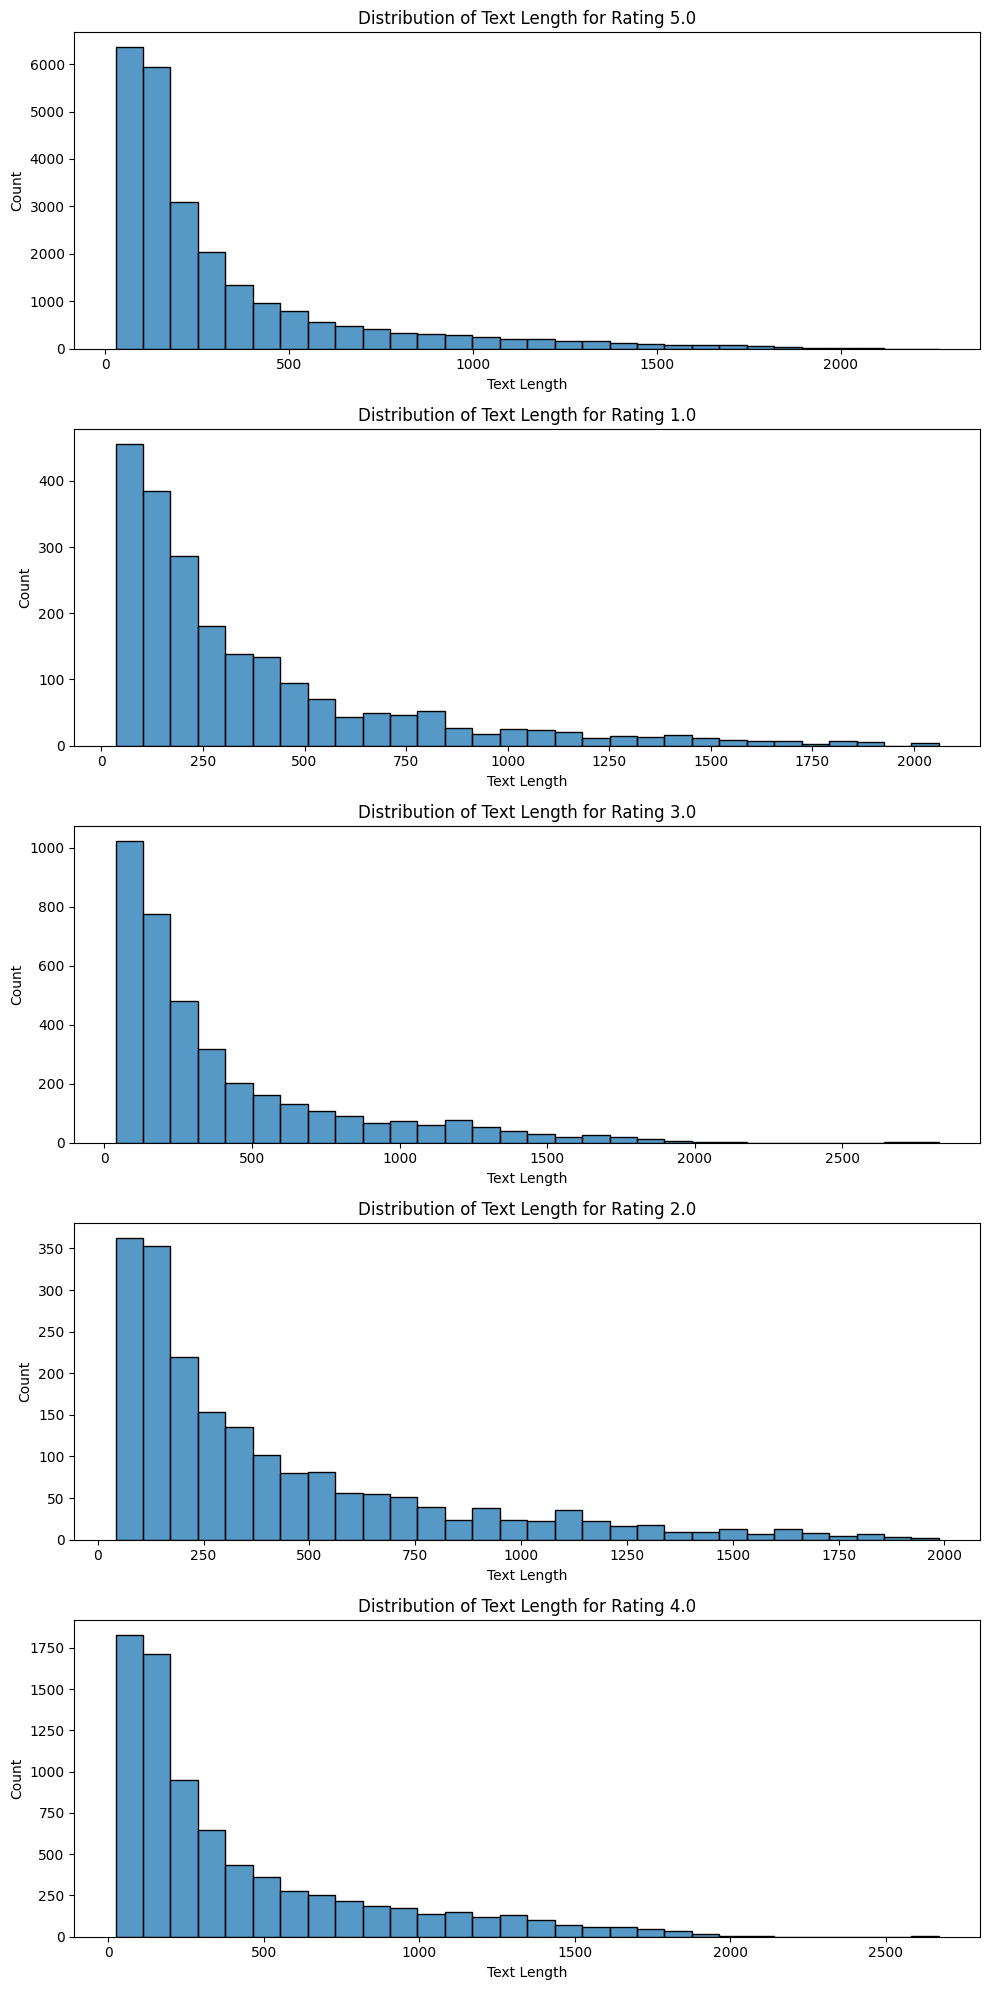

In [ ]:
#text length by rating
fig, ax = plt.subplots(5, 1, figsize=(10, 20))
for i, rating in enumerate(df['rating'].unique()):
    sns.histplot(df[df['rating'] == rating]['text_length'], ax=ax[i], bins=30)
    ax[i].set_title(f'Distribution of Text Length for Rating {rating}')
    ax[i].set_xlabel('Text Length')
    ax[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

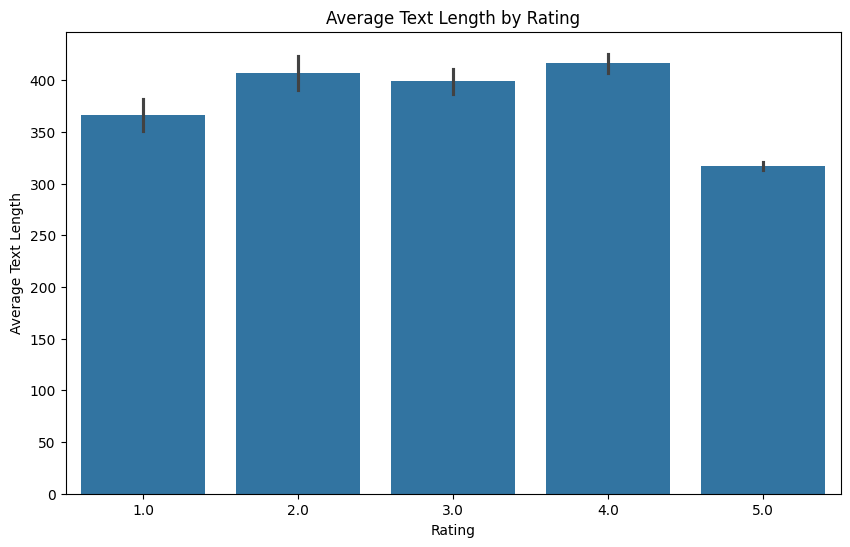

In [ ]:
#Average Text Length by Rating
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='text_length', data=df)
plt.title('Average Text Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Text Length')
plt.show()

Here we are looking at the length of the reviews for each rating. We see from our first set of graphs, which displays the distributions of text length for each rating, that text lengths within each rating seem to be on the shorter side since our graphs are all skewed right. Looking at our next graph comparing the average text length for each rating, we see that all average text lengths are relatively similar on average except for reviews with a rating of 5. The reviews with a rating of 5 were slightly shorter on average compared to the rest of the ratings.

We can also explore the correlations between the text length and the rating:

In [ ]:
df.groupby('category').apply(lambda df_category : df_category['text_length'].corr(df_category['rating']) )

category
Books_5                        -0.116534
Clothing_Shoes_and_Jewelry_5   -0.018641
Electronics_5                  -0.114694
Home_and_Kitchen_5             -0.087540
Kindle_Store_5                 -0.031127
Movies_and_TV_5                -0.129159
Pet_Supplies_5                 -0.068301
Sports_and_Outdoors_5          -0.041449
Tools_and_Home_Improvement_5   -0.105709
Toys_and_Games_5               -0.081826
dtype: float64

The trend is negative across all categories, but relatively small (for some categories like 'Clothing_Shoes_and_Jewelry' it is very close to 0). Intuitively, this makes sense: perhaps, people write longer reviews when they are dissatisfied with the product and want to critique the producers and discourage others from buying this product. We should also keep in mind that our rating distribution is significantly dominated by one rating value "5", which might partially explain why the correlations magnitudes are small.


As a sanitry check we do the same analysis for correlation between the number of words in the review (instead of simply character count) and ratings. The results are pretty much the same:

In [ ]:
df['text_word_count'] = df['text_'].apply(lambda s : len(s.split(' ')))
df.groupby('category').apply(lambda df_category : df_category['text_word_count'].corr(df_category['rating']) )

category
Books_5                        -0.121112
Clothing_Shoes_and_Jewelry_5   -0.020210
Electronics_5                  -0.116166
Home_and_Kitchen_5             -0.085164
Kindle_Store_5                 -0.033686
Movies_and_TV_5                -0.126079
Pet_Supplies_5                 -0.066884
Sports_and_Outdoors_5          -0.041139
Tools_and_Home_Improvement_5   -0.110096
Toys_and_Games_5               -0.084503
dtype: float64

----

The previous observations explored the relationship between the rating and text. Now, we will focus more on trends that could help to distinguish between the labels (which is our actual final problem).

First, we can do a similar histogram comparison per category, but now outputting the text length:

Text length distribution depending on the category; red : computer generated, blue: original response


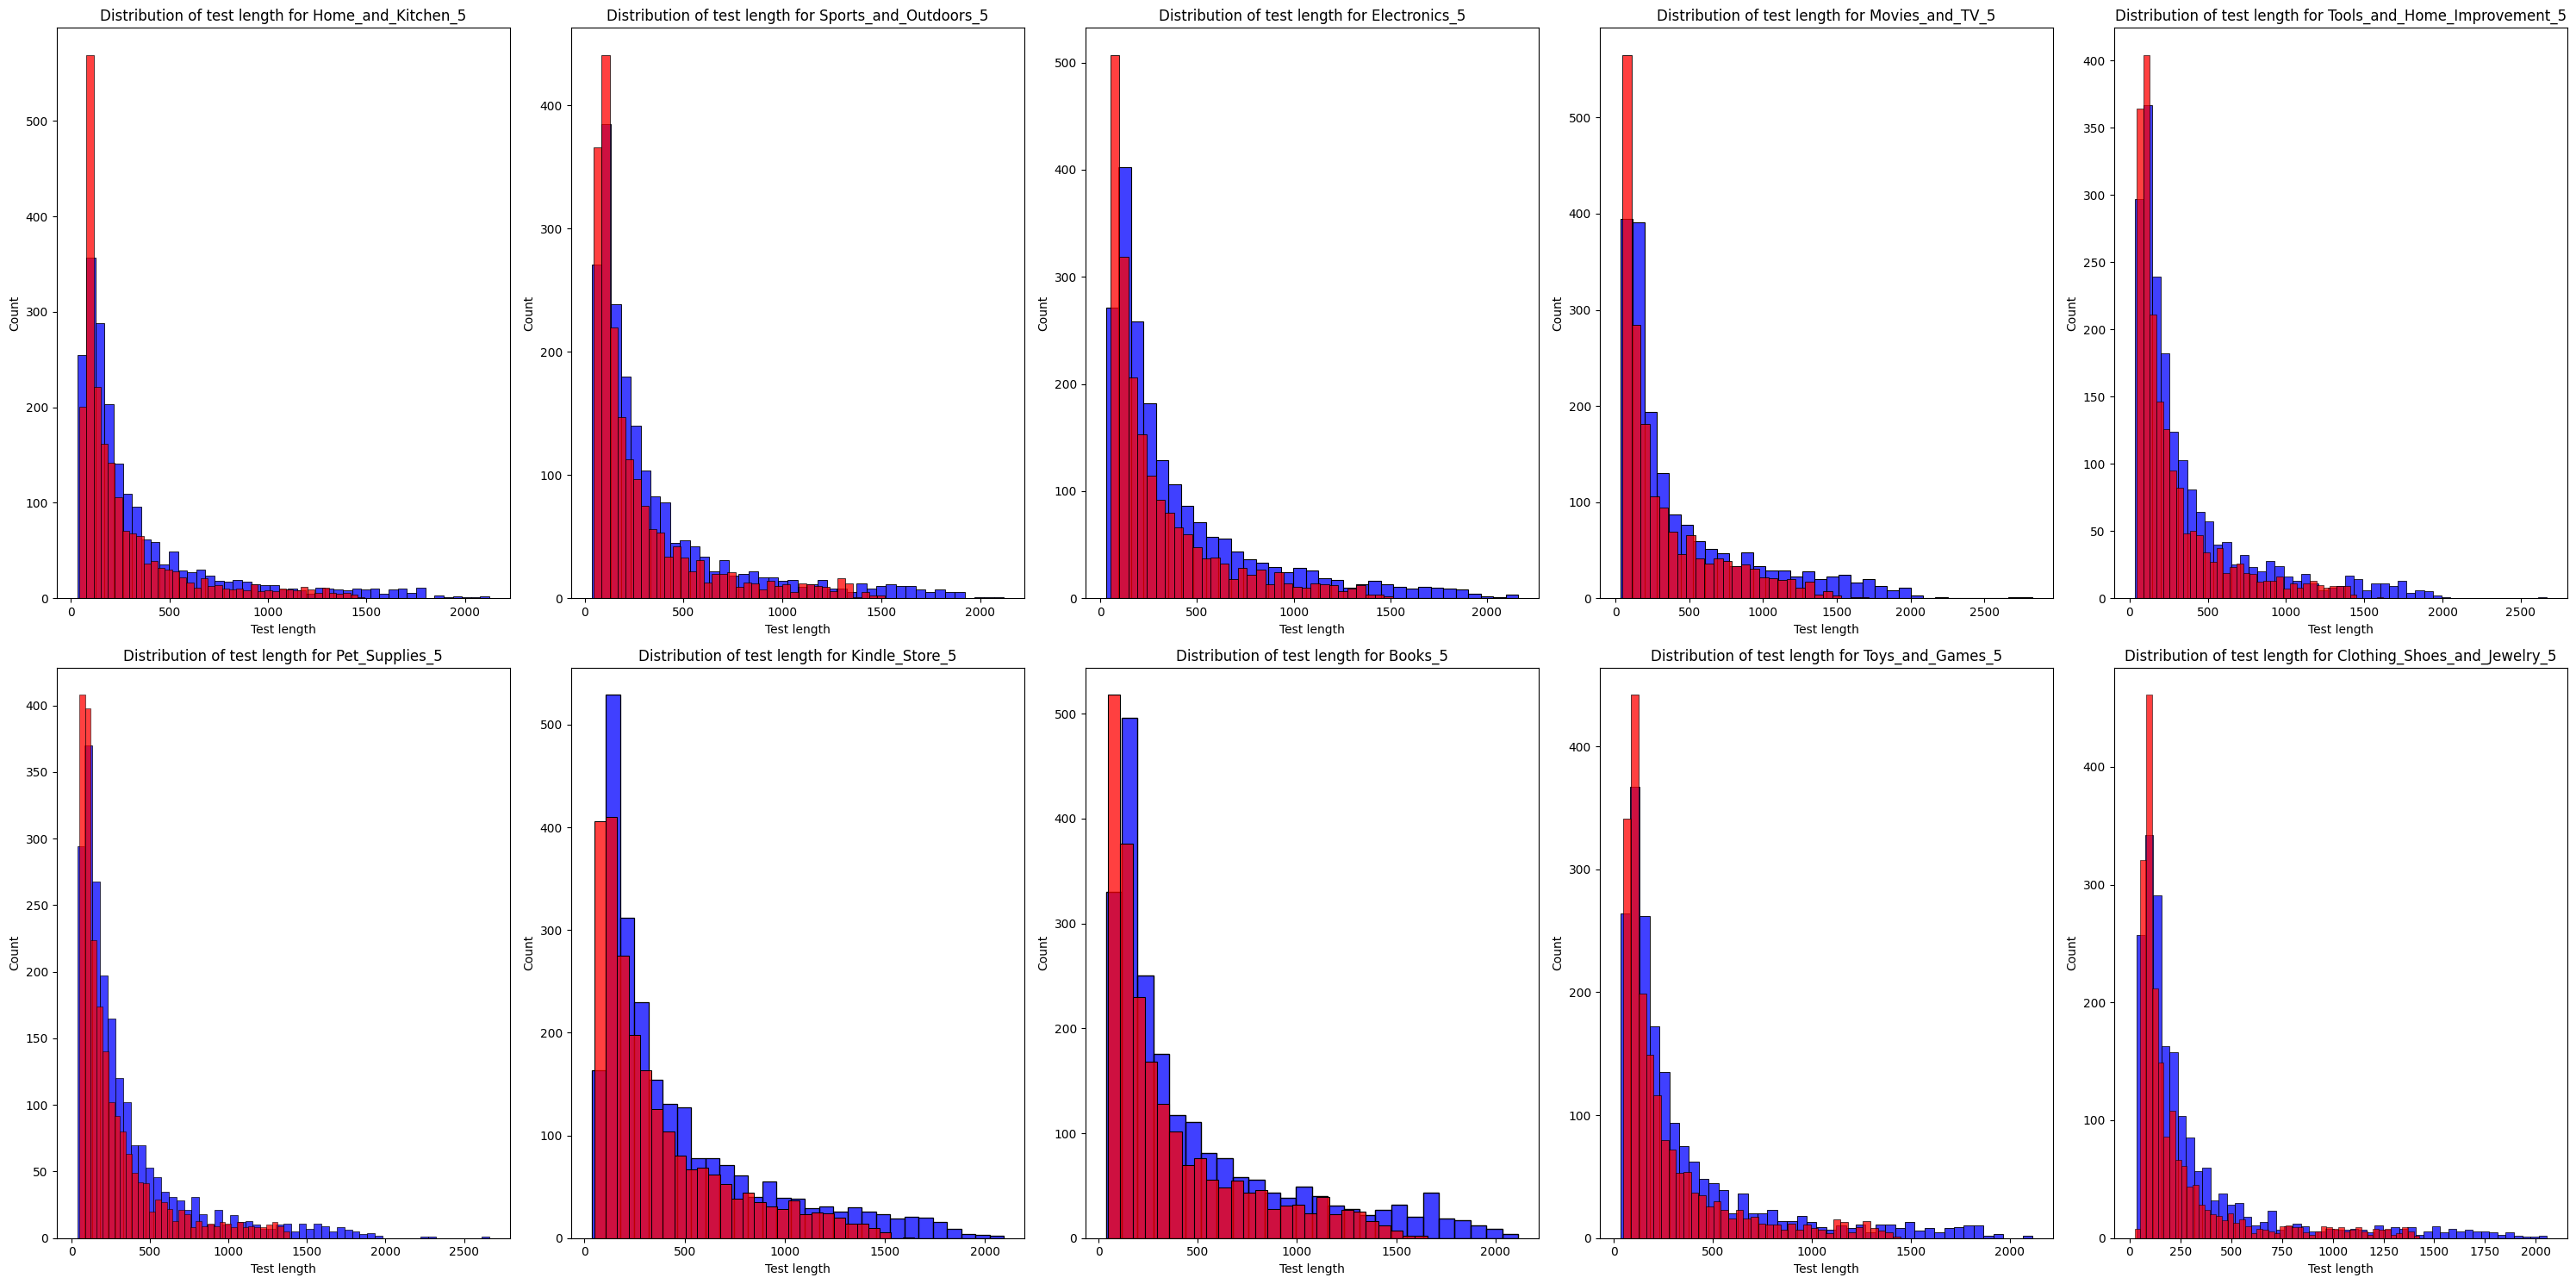

In [ ]:
print('Text length distribution depending on the category; red : computer generated, blue: original response')

fig, ax = plt.subplots(2, 5, figsize=(30, 15))
for i, category in enumerate(df['category'].unique()):
    sns.histplot(df[(df['category'] == category) & (df['label'] == 'OR')]['text_length'], ax=ax[i//5, i%5], color = 'blue')
    sns.histplot(df[(df['category'] == category) & (df['label'] == 'CG')]['text_length'], ax=ax[i//5, i%5], color = 'red')
    ax[i//5, i%5].set_title(f'Distribution of test length for {category}')
    ax[i//5, i%5].set_xlabel('Test length')
    ax[i//5, i%5].set_ylabel('Count')

plt.tight_layout()
plt.show()

Generally, we see that blue histograms "encapsulate" the red ones, i.e., texts generated by humans are longer. It is especially true for the tails of blue distributions: seems like computer fake reviews never exceed 1500 characters in length (interestingly that this cutoff is roughly the same for all categories)


We can also look at specific symbols and their count in texts. For instance, the code below performs the same analysis when counting the number of exclamation signs in the text:

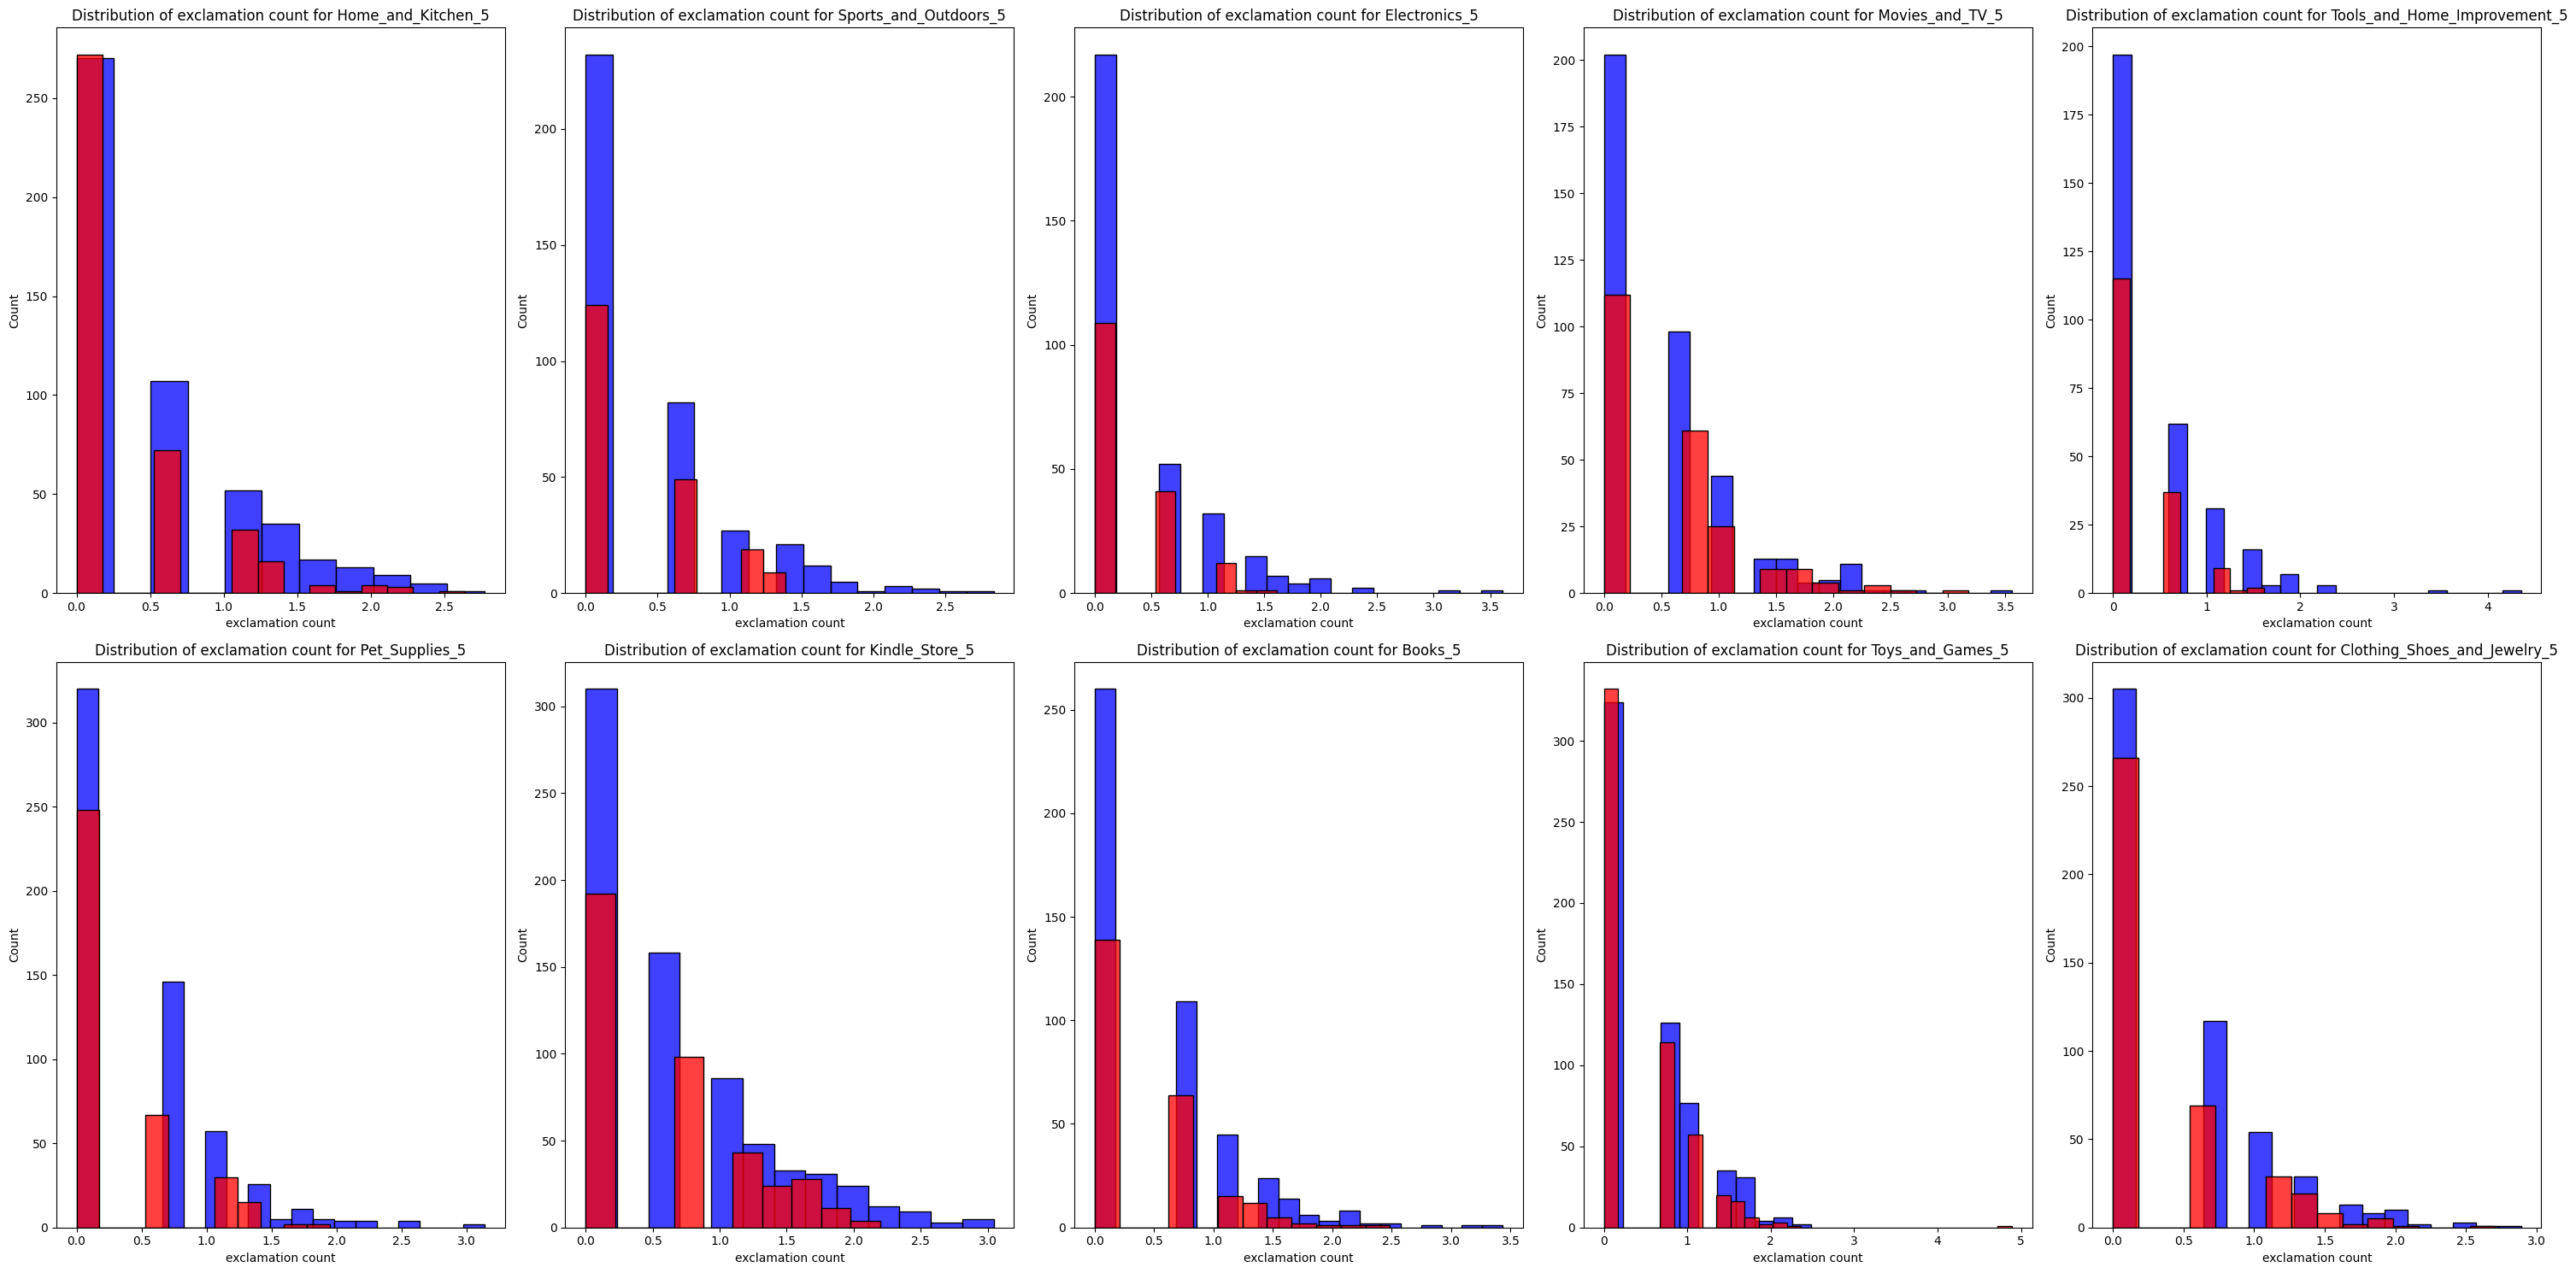

In [ ]:
df['text_exclamation_count'] = df['text_'].apply(lambda s : s.count('!'))

fig, ax = plt.subplots(2, 5, figsize=(30, 15))
for i, category in enumerate(df['category'].unique()):
    sns.histplot(np.log(df[(df['category'] == category) & (df['label'] == 'OR')]['text_exclamation_count']), ax=ax[i//5, i%5], color = 'blue')
    sns.histplot(np.log(df[(df['category'] == category) & (df['label'] == 'CG')]['text_exclamation_count']), ax=ax[i//5, i%5], color = 'red')
    ax[i//5, i%5].set_title(f'Distribution of exclamation count for {category}')
    ax[i//5, i%5].set_xlabel('exclamation count')
    ax[i//5, i%5].set_ylabel('Count')

plt.tight_layout()
plt.show()

As expected, human generated texts usually have more exclamation marks.
One potential explanaton is that it is harder for AI-based language models (or generally computer) to generate cohesive emotional texts.

Observations like this can be guide us to explore emotion-related features when applying GPT models our problems.

## EDA Discussion

Our data consists of text, category, and rating. Based on these variables, we try to predict the outcome (if the review was computer-generated or not). In our EDA, we have cleaned the data and created one-hot encoding for the rating and category variables. \

In our EDA analysis, we did not find convincing evidence that we can make an accurate prediction without analyzing text directly. Indeed, for both computer generated and human generated texts, the distribution of ratings, length of reviews, and categories was roughly similar among all the categories (below you can find the logistic regression that attempts to make a prediction based on these variables and achieves rather modest accuracy of 68%; purely random model would have accuracy of 50%). The vast majority of reviews have rating of 5 which decreases the predictive power of this variable as well. \

Our conclusion is that the most powerful variable to predict the outcome is the text itself which we implemented in our baseline models 2 and 3. For the final submission, we also added other predictors to our model as well to improve the accuracy

# Part 3: Baseline Modeling

## Baseline Model Selection and Justification:
Broadly speaking, we tried two different approaches: (1) either utilize everything except review's text (e.g., baseline model 1 -- Logistic Regression on all numeric features), or (2) using only text. The idea is to see how these models perform independently from each other with a premise of performance improvement when combined together.


## Baseline model 1: Logistic Regression
For this model we will try to use all numeric features (including One-hot categorical ones) created during the EDA to predict label with a simple logistic Regression model. This is something that people would try to use before the NLP community figured out how to model sequential tasks.

![picture](https://drive.google.com/uc?export=view&id=1Cp4EqXTIZZgUVQ-NzWTcPVAShs3oQLk4)



In [ ]:
X = df.drop(['label', 'text_', 'category', 'CG'], axis=1)
y = df['CG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)


In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred))

# Recall
print("Recall:", recall_score(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

# ROC-AUC Score
# For ROC-AUC, you need the probabilities of the positive class


Accuracy: 0.679737753587333
Precision: 0.6508926650892665
Recall: 0.7580160320641283
F1 Score: 0.7003819002430274


The logistic regression model established as our baseline for detecting fake reviews shows promising initial results, with an accuracy of 67.97%, precision of 65.09%, recall of 75.8%, and an F1 score of 70.04%. These metrics suggest a solid foundation, especially in terms of recall, indicating the model's strength in correctly identifying a high proportion of fake reviews. The choice of logistic regression for the baseline model is due to its simplicity, interpretability, and efficiency in handling binary classification tasks. By starting with logistic regression, we aim to establish a benchmark for model performance that is straightforward yet effective. This approach allows us to understand the underlying patterns within the data and provides a clear comparison point for more complex models we may explore later in the project. The balance between precision and recall, as reflected in the F1 score, demonstrates the model's ability to provide a reasonable trade-off between identifying as many fake reviews as possible (recall) and maintaining a decent rate of accuracy in its identifications (precision). Thus, this baseline model serves as a valuable starting point for further exploration and improvement in our quest to accurately detect fake reviews.

## Baseline model 2: DistilBERT

An intuitive way to deal with text data is to use a language model. As our baseline, we are using pre-trained BERT (DistilBERT specifically) model and fine-tune to our data. DistilBERT requires fewer computational resources than its predecessor, BERT, while retaining 97% of BERT’s language understanding capabilities while being 40% smaller and 60% faster. DistilBERT can be fine-tuned on specific tasks with a relatively small amount of data. This means it can be adapted to recognize patterns typical of AI-generated texts.

![picture](https://drive.google.com/uc?export=view&id=1ooQEoNM0WQ9npL79Olat6uVf9afwQH19)



In [ ]:
# from transformers import AutoTokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

In [ ]:
def tokenizer_function(input_data, labels):
  input_ids = []
  attention_masks = []
  for sent in input_data:
    this_encoding = tokenizer.encode_plus(sent, truncation=True, pad_to_max_length = True,max_length = 512,return_attention_mask = True,return_tensors = 'pt')
    input_ids.append(this_encoding['input_ids'])
    attention_masks.append( this_encoding['attention_mask'])
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  labels = torch.tensor(labels)
  tokenized_data = TensorDataset(input_ids, attention_masks, labels)
  return tokenized_data

In [ ]:
reviews, labels = list(df['text_']), list((df['label'] == 'CG').astype(int))

In [ ]:
reviews_train, reviews_val, labels_train, labels_val = train_test_split(reviews, labels, test_size=0.2, random_state=109)

train_dataset = tokenizer_function(reviews_train, labels_train)
val_dataset = tokenizer_function(reviews_val, labels_val)

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=2,
                                                            output_attentions = False, output_hidden_states=False)
model.to(device)

B = 32
train_loader = DataLoader(train_dataset, batch_size = B, shuffle=True) #Feel free to experiment with batch sizes
val_loader = DataLoader(val_dataset, batch_size = B, shuffle=True)

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
N_batches = np.ceil(len(reviews_train) / B)

optimizer = AdamW(model.parameters(),
                lr = 1e-2 / N_batches,
                eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
              )

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 104 different named parameters.

==== Embedding Layer ====

distilbert.embeddings.word_embeddings.weight            (28996, 768)
distilbert.embeddings.position_embeddings.weight          (512, 768)
distilbert.embeddings.LayerNorm.weight                        (768,)
distilbert.embeddings.LayerNorm.bias                          (768,)
distilbert.transformer.layer.0.attention.q_lin.weight     (768, 768)

==== First Transformer ====

distilbert.transformer.layer.0.attention.q_lin.bias           (768,)
distilbert.transformer.layer.0.attention.k_lin.weight     (768, 768)
distilbert.transformer.layer.0.attention.k_lin.bias           (768,)
distilbert.transformer.layer.0.attention.v_lin.weight     (768, 768)
distilbert.transformer.layer.0.attention.v_lin.bias           (768,)
distilbert.transformer.layer.0.attention.out_lin.weight   (768, 768)
distilbert.transformer.layer.0.attention.out_lin.bias         (768,)
distilbert.transformer.layer.0.sa_layer_norm.weight           (

In [ ]:
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
total_t0 = time.time()
for epoch in tqdm(range(5)):
  total_train_loss = 0
  model.train()
  for step, batch in enumerate(train_loader):

    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)
    model.zero_grad()
    outputs = model(b_input_ids,
                            attention_mask=b_input_mask,
                            labels=b_labels)
    loss = outputs.loss
    total_train_loss += loss
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    if(step %10 == 0):
      print(loss)

  avg_train_loss = total_train_loss / len(train_loader)
  print("")
  print("  Average training loss: {0:.2f}".format(avg_train_loss))

  print("")
  print("Running Validation...")

  t0 = time.time()

  # Put the model in evaluation mode-
  model.eval()

  # Tracking variables
  total_eval_accuracy = 0
  total_eval_loss = 0
  nb_eval_steps = 0

    # Evaluate data for one epoch
  for batch in val_loader:
      #
      # `batch` contains three pytorch tensors:
      #   [0]: input ids
      #   [1]: attention masks
      #   [2]: labels
      b_input_ids = batch[0].to(device)
      b_input_mask = batch[1].to(device)
      b_labels = batch[2].to(device)

      with torch.no_grad():

          outputs = model(b_input_ids,
                                  attention_mask=b_input_mask,
                                  labels=b_labels)

      # Accumulate the validation loss.
      loss = outputs.loss
      logits = outputs.logits
      total_eval_loss += loss.item()

      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()

      # Calculate the accuracy for this batch of test sentences, and
      # accumulate it over all batches.
      total_eval_accuracy += flat_accuracy(logits, label_ids)


  # Report the final accuracy for this validation run.
  avg_val_accuracy = total_eval_accuracy / len(val_loader)
  print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

  # Calculate the average loss over all of the batches.
  avg_val_loss = total_eval_loss / len(val_loader)

  # Measure how long the validation run took.
  validation_time = format_time(time.time() - t0)

  print("  Validation Loss: {0:.2f}".format(avg_val_loss))
  print("  Validation took: {:}".format(validation_time))

print("")
print("Training complete!")

print("Total training took {:}".format(format_time(time.time()-total_t0)))

  0%|          | 0/5 [00:00<?, ?it/s]

tensor(0.7117, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7102, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6569, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5895, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5760, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3885, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4201, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2425, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1988, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2372, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1698, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1390, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3173, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1639, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0904, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1728, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1307, device='cuda:0', grad_fn=

 20%|██        | 1/5 [25:18<1:41:12, 1518.14s/it]

  Accuracy: 0.96
  Validation Loss: 0.11
  Validation took: 0:02:09
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3417, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0627, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0998, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1504, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0776, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0694, device='cuda:0', 

 40%|████      | 2/5 [50:38<1:15:59, 1519.72s/it]

  Accuracy: 0.96
  Validation Loss: 0.15
  Validation took: 0:02:08
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0097, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0511, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1274, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0532, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', 

 60%|██████    | 3/5 [1:15:58<50:39, 1519.71s/it]

  Accuracy: 0.97
  Validation Loss: 0.14
  Validation took: 0:02:08
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0105, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2147, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1177, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0522, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', 

 80%|████████  | 4/5 [1:41:17<25:19, 1519.34s/it]

  Accuracy: 0.97
  Validation Loss: 0.16
  Validation took: 0:02:08
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0515, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2788, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', 

100%|██████████| 5/5 [2:06:36<00:00, 1519.20s/it]

  Accuracy: 0.97
  Validation Loss: 0.18
  Validation took: 0:02:08

Training complete!
Total training took 2:06:36


  0%|          | 0/5 [00:00<?, ?it/s]tensor(0.7117, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7102, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6569, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5895, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5760, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3885, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4201, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2425, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1988, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2372, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1698, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1390, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3173, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1639, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0904, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1728, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1307, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1076, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1142, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0819, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2477, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0443, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0524, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0965, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1797, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0594, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1750, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1826, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0911, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1661, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0492, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1122, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0994, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2211, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2319, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1728, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0591, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2682, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2156, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0949, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1171, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0289, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0108, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1065, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0635, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2669, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1507, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3288, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0478, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1528, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2854, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0618, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1694, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0465, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1277, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0233, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1207, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2496, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0370, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0842, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1124, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1208, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5475, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2260, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2661, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0840, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1538, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1576, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2854, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1571, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1330, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1172, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1230, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0899, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1826, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0433, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1240, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0229, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)

  Average training loss: 0.15

Running Validation...
 20%|██        | 1/5 [25:18<1:41:12, 1518.14s/it]  Accuracy: 0.96
  Validation Loss: 0.11
  Validation took: 0:02:09
  
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3417, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0627, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0998, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1504, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0776, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0694, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3806, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0691, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0552, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1940, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2292, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0482, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1367, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0781, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0897, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1261, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0652, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0632, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0356, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1292, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0166, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0517, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1186, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0589, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0480, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1144, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0923, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0291, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1352, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0647, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0606, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0141, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0637, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0655, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0288, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0140, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1156, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1328, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2154, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0841, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1622, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1187, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0685, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0465, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0841, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1547, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0447, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1730, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5093, device='cuda:0', grad_fn=<NllLossBackward0>)

  Average training loss: 0.06

Running Validation...
 40%|████      | 2/5 [50:38<1:15:59, 1519.72s/it]  Accuracy: 0.96
  Validation Loss: 0.15
  Validation took: 0:02:08

tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0097, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0511, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1274, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0532, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0587, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0166, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0439, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0701, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0700, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0081, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0816, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0720, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1523, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0988, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1093, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0564, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0546, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0962, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0096, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0052, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0388, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1958, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0440, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0921, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0482, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)

  Average training loss: 0.03

Running Validation...
 60%|██████    | 3/5 [1:15:58<50:39, 1519.71s/it]  Accuracy: 0.97
  Validation Loss: 0.14
  Validation took: 0:02:08

tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0105, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2147, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1177, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0522, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1348, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1838, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2765, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2986, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0542, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1815, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2311, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3085, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.1989e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.4404e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.5697e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0282, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1938, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1195, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0685, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)

  Average training loss: 0.02

Running Validation...
 80%|████████  | 4/5 [1:41:17<25:19, 1519.34s/it]  Accuracy: 0.97
  Validation Loss: 0.16
  Validation took: 0:02:08

tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0515, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2788, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0959, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0655, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0315, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.4103e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.1013e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.5983e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.4694e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.7358e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.1323e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.0589e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.5415e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.7687e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.3057e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.5072e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.2843e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0643, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.5246e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.6817e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.2956e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.6887e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.4583e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.8763e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.0553e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.7380e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.2816e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.4082e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.3203e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1644, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.3256e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.6275e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.4671e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.3434e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.2624e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.4584e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2157, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.9317e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.3575e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.6383e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.4758e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.5731e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0580, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1338, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.8175e-05, device='cuda:0', grad_fn=<NllLossBackward0>)

  Average training loss: 0.01

Running Validation...
100%|██████████| 5/5 [2:06:36<00:00, 1519.20s/it]  Accuracy: 0.97
  Validation Loss: 0.18
  Validation took: 0:02:08

Training complete!
Total training took 2:06:36

In [ ]:
torch.save(model, "./model_DistilBert.keras")

In [ ]:
def evaluate_binary_prediction(y_pred, y_test):

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

In [ ]:
## missing calling the model

This baseline model has one huge advantage and one huge disadvantage: it works very well (val accuracy of 97%), with just a few epochs. In fact, 96% accuracy was already obtained after just a first epoch. This is indeed the power of pretrained large models!

At the same time, even this smaller version of Bert is quite heavy and takes long time to train. In the future we want to look into ways to optimize the model so that it takes less time. Partially, this is also limitation of the small memory capacity of the free version of Google Colab, i.e., with higher GPU memory we could fit larger batch size (than 32), and thus speed up the training by a factor.

## Baseline model 3: the RNN

The choice of RNN is intuitive. It is a relatively easy-to-train model that takes a sequence and outputs a label. RNNs are inherently designed to handle sequential data. They process text one word (or character) at a time, maintaining a form of memory that captures information about previous inputs. This ability to remember past inputs makes RNNs particularly good at understanding context and dependencies in text data. We believe that the choice of symbols (and sequences of symbols) is different for human and computer-generated reviews. The RNN would be able to capture these differences through the hidden state, and thus properly label text as either generated or human.

![picture](https://drive.google.com/uc?export=view&id=1M2HjM8XIeXaNEyLe0dwQqx3XOe2n-ija)




In [ ]:
# shuffle the dataset
idx = np.random.choice(np.arange(df.shape[0]), size=int(df.shape[0]), replace = False)
reviews, labels = list(df.iloc[idx]['text_']), list((df.iloc[idx]['label'] == 'CG').astype(int))

In [ ]:
# creating the set of all the used symbols
chars = set(['']) # '' is going to be the symbol for padding
for text in df['text_']:
    chars.update(set(text))
char2idx = {val: ind for ind, val in enumerate(chars)}
idx2char = {val: ind for ind, val in char2idx.items()}

In [ ]:
# convert the text into encoded sequence of numbers
SEQ_LEN = 300
padding = char2idx['']
x = np.zeros((len(reviews), SEQ_LEN), dtype=int)
for i in range(len(reviews)):
    text = [char2idx[symb] for symb in reviews[i]]
    if len(text) > SEQ_LEN:
        text = text[:SEQ_LEN]
    if len(text) < SEQ_LEN:
        text = [padding] * (SEQ_LEN - len(text)) + text
    x[i] = text
y = np.array(labels)
print(x.shape)
print(y.shape)

(40420, 300)
(40420,)


In [ ]:
# creating the data pipeline
# Create a TensorFlow dataset from tensor slices
dataset = tf.data.Dataset.from_tensor_slices((x, y))

# Shuffle the dataset
dataset = dataset.shuffle(buffer_size=len(x))

# Batch the dataset into smaller chunks
batch_size = 256
dataset = dataset.batch(batch_size)

# Prefetch the dataset to keep the GPU busy while CPU is preparing the next batch
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

val_data = dataset.take(10)
train_data = dataset.skip(10)

We tried many different architectures to find the best one. Here are the recordings of our trials: \
RECORDINGS (hidden_state, num_feature -> val accuracy): \
1) 16, 16 -> 90% \
2) 32, 16 -> 88% \
3) 16, 32 -> 93% \
4) 16, 64 -> 95% \
5) 32, 64 -> 95% \
6) 16, 128 -> 94% \
7) 16, 64, added one more Dense layer -> 95.5% \
8) Added dropout layer -> no significant change \
9) Changed SEQ_LEN to 300 -> 96% \
10) Changed SEQ_LEN to 200 -> 95% \

Our choice is hidden_state = 16, num_feature = 64 with SEQ_LEN = 300

In [ ]:
# defining the ~best~ model
num_feature = 64
h_size = 16

model = keras.Sequential()
model.add(Embedding(len(chars), num_feature, input_length=SEQ_LEN))
model.add(LSTM(units=h_size, input_shape=(SEQ_LEN, num_feature), return_sequences=False))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 64)           6400      
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11873 (46.38 KB)
Trainable params: 11873 (46.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_data, epochs=150, validation_data=val_data)

Epoch 1/150
148/148 [==============================] - 39s 239ms/step - loss: 0.5623 - accuracy: 0.7169 - val_loss: 0.4269 - val_accuracy: 0.8219
Epoch 2/150
148/148 [==============================] - 42s 284ms/step - loss: 0.4252 - accuracy: 0.8112 - val_loss: 0.4092 - val_accuracy: 0.8117
Epoch 3/150
148/148 [==============================] - 35s 231ms/step - loss: 0.4125 - accuracy: 0.8148 - val_loss: 0.4000 - val_accuracy: 0.8215
Epoch 4/150
148/148 [==============================] - 36s 240ms/step - loss: 0.3980 - accuracy: 0.8221 - val_loss: 0.3667 - val_accuracy: 0.8422
Epoch 5/150
148/148 [==============================] - 34s 229ms/step - loss: 0.3855 - accuracy: 0.8297 - val_loss: 0.3666 - val_accuracy: 0.8367
Epoch 6/150
148/148 [==============================] - 34s 232ms/step - loss: 0.3667 - accuracy: 0.8370 - val_loss: 0.3486 - val_accuracy: 0.8422
Epoch 7/150
148/148 [==============================] - 37s 248ms/step - loss: 0.3466 - accuracy: 0.8453 - val_loss: 0.3157 -

Epoch 1/150
148/148 [==============================] - 39s 239ms/step - loss: 0.5623 - accuracy: 0.7169 - val_loss: 0.4269 - val_accuracy: 0.8219
Epoch 2/150
148/148 [==============================] - 42s 284ms/step - loss: 0.4252 - accuracy: 0.8112 - val_loss: 0.4092 - val_accuracy: 0.8117
Epoch 3/150
148/148 [==============================] - 35s 231ms/step - loss: 0.4125 - accuracy: 0.8148 - val_loss: 0.4000 - val_accuracy: 0.8215
Epoch 4/150
148/148 [==============================] - 36s 240ms/step - loss: 0.3980 - accuracy: 0.8221 - val_loss: 0.3667 - val_accuracy: 0.8422
Epoch 5/150
148/148 [==============================] - 34s 229ms/step - loss: 0.3855 - accuracy: 0.8297 - val_loss: 0.3666 - val_accuracy: 0.8367
Epoch 6/150
148/148 [==============================] - 34s 232ms/step - loss: 0.3667 - accuracy: 0.8370 - val_loss: 0.3486 - val_accuracy: 0.8422
Epoch 7/150
148/148 [==============================] - 37s 248ms/step - loss: 0.3466 - accuracy: 0.8453 - val_loss: 0.3157 - val_accuracy: 0.8586
Epoch 8/150
148/148 [==============================] - 33s 225ms/step - loss: 0.3359 - accuracy: 0.8491 - val_loss: 0.3246 - val_accuracy: 0.8531
Epoch 9/150
148/148 [==============================] - 37s 250ms/step - loss: 0.3335 - accuracy: 0.8514 - val_loss: 0.3297 - val_accuracy: 0.8570
Epoch 10/150
148/148 [==============================] - 36s 241ms/step - loss: 0.3241 - accuracy: 0.8557 - val_loss: 0.3276 - val_accuracy: 0.8566
Epoch 11/150
148/148 [==============================] - 35s 234ms/step - loss: 0.3098 - accuracy: 0.8649 - val_loss: 0.2974 - val_accuracy: 0.8602
Epoch 12/150
148/148 [==============================] - 33s 226ms/step - loss: 0.3010 - accuracy: 0.8693 - val_loss: 0.2757 - val_accuracy: 0.8789
Epoch 13/150
148/148 [==============================] - 35s 233ms/step - loss: 0.3393 - accuracy: 0.8465 - val_loss: 0.2965 - val_accuracy: 0.8691
Epoch 14/150
148/148 [==============================] - 36s 241ms/step - loss: 0.2893 - accuracy: 0.8758 - val_loss: 0.3016 - val_accuracy: 0.8707
Epoch 15/150
148/148 [==============================] - 34s 226ms/step - loss: 0.2818 - accuracy: 0.8781 - val_loss: 0.2926 - val_accuracy: 0.8797
Epoch 16/150
148/148 [==============================] - 34s 228ms/step - loss: 0.2821 - accuracy: 0.8798 - val_loss: 0.2781 - val_accuracy: 0.8828
Epoch 17/150
148/148 [==============================] - 38s 259ms/step - loss: 0.2685 - accuracy: 0.8849 - val_loss: 0.2694 - val_accuracy: 0.8844
Epoch 18/150
148/148 [==============================] - 36s 239ms/step - loss: 0.2656 - accuracy: 0.8877 - val_loss: 0.2867 - val_accuracy: 0.8770
Epoch 19/150
148/148 [==============================] - 34s 231ms/step - loss: 0.3292 - accuracy: 0.8553 - val_loss: 0.2610 - val_accuracy: 0.8891
Epoch 20/150
148/148 [==============================] - 33s 222ms/step - loss: 0.2643 - accuracy: 0.8886 - val_loss: 0.2759 - val_accuracy: 0.8816
Epoch 21/150
148/148 [==============================] - 35s 235ms/step - loss: 0.2579 - accuracy: 0.8911 - val_loss: 0.2573 - val_accuracy: 0.8926
Epoch 22/150
148/148 [==============================] - 36s 240ms/step - loss: 0.2622 - accuracy: 0.8892 - val_loss: 0.2477 - val_accuracy: 0.8945
Epoch 23/150
148/148 [==============================] - 34s 228ms/step - loss: 0.2482 - accuracy: 0.8937 - val_loss: 0.2283 - val_accuracy: 0.9043
Epoch 24/150
148/148 [==============================] - 36s 244ms/step - loss: 0.2516 - accuracy: 0.8929 - val_loss: 0.2283 - val_accuracy: 0.9027
Epoch 25/150
148/148 [==============================] - 33s 226ms/step - loss: 0.2410 - accuracy: 0.8985 - val_loss: 0.2191 - val_accuracy: 0.9133
Epoch 26/150
148/148 [==============================] - 36s 240ms/step - loss: 0.2413 - accuracy: 0.8976 - val_loss: 0.2222 - val_accuracy: 0.9074
Epoch 27/150
148/148 [==============================] - 34s 227ms/step - loss: 0.2362 - accuracy: 0.9009 - val_loss: 0.2285 - val_accuracy: 0.9023
Epoch 28/150
148/148 [==============================] - 35s 235ms/step - loss: 0.2331 - accuracy: 0.9023 - val_loss: 0.2174 - val_accuracy: 0.9078
Epoch 29/150
148/148 [==============================] - 35s 233ms/step - loss: 0.2294 - accuracy: 0.9032 - val_loss: 0.2105 - val_accuracy: 0.9172
Epoch 30/150
148/148 [==============================] - 36s 242ms/step - loss: 0.2293 - accuracy: 0.9046 - val_loss: 0.2164 - val_accuracy: 0.9074
Epoch 31/150
148/148 [==============================] - 34s 228ms/step - loss: 0.2292 - accuracy: 0.9054 - val_loss: 0.2429 - val_accuracy: 0.8863
Epoch 32/150
148/148 [==============================] - 34s 232ms/step - loss: 0.2183 - accuracy: 0.9099 - val_loss: 0.2114 - val_accuracy: 0.9117
Epoch 33/150
148/148 [==============================] - 38s 254ms/step - loss: 0.2149 - accuracy: 0.9106 - val_loss: 0.1968 - val_accuracy: 0.9195
Epoch 34/150
148/148 [==============================] - 34s 231ms/step - loss: 0.2103 - accuracy: 0.9129 - val_loss: 0.2180 - val_accuracy: 0.9082
Epoch 35/150
148/148 [==============================] - 35s 232ms/step - loss: 0.2066 - accuracy: 0.9149 - val_loss: 0.1913 - val_accuracy: 0.9180
Epoch 36/150
148/148 [==============================] - 33s 224ms/step - loss: 0.2052 - accuracy: 0.9155 - val_loss: 0.2157 - val_accuracy: 0.9109
Epoch 37/150
148/148 [==============================] - 34s 228ms/step - loss: 0.2045 - accuracy: 0.9158 - val_loss: 0.1881 - val_accuracy: 0.9215
Epoch 38/150
148/148 [==============================] - 34s 227ms/step - loss: 0.1954 - accuracy: 0.9207 - val_loss: 0.1904 - val_accuracy: 0.9230
Epoch 39/150
148/148 [==============================] - 37s 249ms/step - loss: 0.2001 - accuracy: 0.9193 - val_loss: 0.2177 - val_accuracy: 0.9094
Epoch 40/150
148/148 [==============================] - 34s 226ms/step - loss: 0.1932 - accuracy: 0.9204 - val_loss: 0.1916 - val_accuracy: 0.9184
Epoch 41/150
148/148 [==============================] - 33s 220ms/step - loss: 0.1903 - accuracy: 0.9230 - val_loss: 0.1976 - val_accuracy: 0.9199
Epoch 42/150
148/148 [==============================] - 34s 229ms/step - loss: 0.1870 - accuracy: 0.9250 - val_loss: 0.1628 - val_accuracy: 0.9344
Epoch 43/150
148/148 [==============================] - 35s 234ms/step - loss: 0.1802 - accuracy: 0.9273 - val_loss: 0.1767 - val_accuracy: 0.9297
Epoch 44/150
148/148 [==============================] - 34s 230ms/step - loss: 0.1801 - accuracy: 0.9270 - val_loss: 0.1858 - val_accuracy: 0.9270
Epoch 45/150
148/148 [==============================] - 33s 225ms/step - loss: 0.1755 - accuracy: 0.9284 - val_loss: 0.1567 - val_accuracy: 0.9355
Epoch 46/150
148/148 [==============================] - 37s 251ms/step - loss: 0.1704 - accuracy: 0.9314 - val_loss: 0.1672 - val_accuracy: 0.9359
Epoch 47/150
148/148 [==============================] - 33s 222ms/step - loss: 0.1715 - accuracy: 0.9289 - val_loss: 0.1696 - val_accuracy: 0.9273
Epoch 48/150
148/148 [==============================] - 34s 228ms/step - loss: 0.1673 - accuracy: 0.9331 - val_loss: 0.1461 - val_accuracy: 0.9441
Epoch 49/150
148/148 [==============================] - 35s 232ms/step - loss: 0.1719 - accuracy: 0.9309 - val_loss: 0.2326 - val_accuracy: 0.9148
Epoch 50/150
148/148 [==============================] - 35s 237ms/step - loss: 0.1659 - accuracy: 0.9345 - val_loss: 0.1665 - val_accuracy: 0.9293
Epoch 51/150
148/148 [==============================] - 34s 226ms/step - loss: 0.1601 - accuracy: 0.9359 - val_loss: 0.1795 - val_accuracy: 0.9242
Epoch 52/150
148/148 [==============================] - 34s 228ms/step - loss: 0.1684 - accuracy: 0.9323 - val_loss: 0.1540 - val_accuracy: 0.9414
Epoch 53/150
148/148 [==============================] - 34s 225ms/step - loss: 0.1565 - accuracy: 0.9373 - val_loss: 0.1469 - val_accuracy: 0.9398
Epoch 54/150
148/148 [==============================] - 38s 256ms/step - loss: 0.1560 - accuracy: 0.9379 - val_loss: 0.1704 - val_accuracy: 0.9316
Epoch 55/150
148/148 [==============================] - 33s 223ms/step - loss: 0.1541 - accuracy: 0.9376 - val_loss: 0.1499 - val_accuracy: 0.9402
Epoch 56/150
148/148 [==============================] - 35s 239ms/step - loss: 0.1662 - accuracy: 0.9331 - val_loss: 0.1724 - val_accuracy: 0.9309
Epoch 57/150
148/148 [==============================] - 35s 235ms/step - loss: 0.1520 - accuracy: 0.9388 - val_loss: 0.1403 - val_accuracy: 0.9441
Epoch 58/150
148/148 [==============================] - 34s 231ms/step - loss: 0.1499 - accuracy: 0.9392 - val_loss: 0.1363 - val_accuracy: 0.9484
Epoch 59/150
148/148 [==============================] - 33s 222ms/step - loss: 0.1507 - accuracy: 0.9397 - val_loss: 0.1652 - val_accuracy: 0.9273
Epoch 60/150
148/148 [==============================] - 33s 219ms/step - loss: 0.1479 - accuracy: 0.9411 - val_loss: 0.1521 - val_accuracy: 0.9418
Epoch 61/150
148/148 [==============================] - 35s 236ms/step - loss: 0.1488 - accuracy: 0.9399 - val_loss: 0.1352 - val_accuracy: 0.9500
Epoch 62/150
148/148 [==============================] - 35s 236ms/step - loss: 0.1490 - accuracy: 0.9410 - val_loss: 0.1452 - val_accuracy: 0.9395
Epoch 63/150
148/148 [==============================] - 34s 231ms/step - loss: 0.1484 - accuracy: 0.9400 - val_loss: 0.1620 - val_accuracy: 0.9371
Epoch 64/150
148/148 [==============================] - 33s 224ms/step - loss: 0.1403 - accuracy: 0.9443 - val_loss: 0.1172 - val_accuracy: 0.9527
Epoch 65/150
148/148 [==============================] - 35s 235ms/step - loss: 0.1408 - accuracy: 0.9438 - val_loss: 0.1299 - val_accuracy: 0.9441
Epoch 66/150
148/148 [==============================] - 36s 241ms/step - loss: 0.1427 - accuracy: 0.9436 - val_loss: 0.1329 - val_accuracy: 0.9473
Epoch 67/150
148/148 [==============================] - 34s 226ms/step - loss: 0.1410 - accuracy: 0.9429 - val_loss: 0.1375 - val_accuracy: 0.9445
Epoch 68/150
148/148 [==============================] - 36s 246ms/step - loss: 0.1372 - accuracy: 0.9453 - val_loss: 0.1205 - val_accuracy: 0.9531
Epoch 69/150
148/148 [==============================] - 33s 219ms/step - loss: 0.1374 - accuracy: 0.9453 - val_loss: 0.1186 - val_accuracy: 0.9543
Epoch 70/150
148/148 [==============================] - 34s 231ms/step - loss: 0.1344 - accuracy: 0.9463 - val_loss: 0.1322 - val_accuracy: 0.9480
Epoch 71/150
148/148 [==============================] - 34s 231ms/step - loss: 0.1341 - accuracy: 0.9462 - val_loss: 0.1134 - val_accuracy: 0.9547
Epoch 72/150
148/148 [==============================] - 33s 221ms/step - loss: 0.1331 - accuracy: 0.9476 - val_loss: 0.1254 - val_accuracy: 0.9543
Epoch 73/150
148/148 [==============================] - 33s 225ms/step - loss: 0.1356 - accuracy: 0.9468 - val_loss: 0.1359 - val_accuracy: 0.9449
Epoch 74/150
148/148 [==============================] - 35s 239ms/step - loss: 0.1287 - accuracy: 0.9492 - val_loss: 0.1294 - val_accuracy: 0.9484
Epoch 75/150
148/148 [==============================] - 33s 223ms/step - loss: 0.1298 - accuracy: 0.9483 - val_loss: 0.1458 - val_accuracy: 0.9434
Epoch 76/150
148/148 [==============================] - 36s 241ms/step - loss: 0.1299 - accuracy: 0.9487 - val_loss: 0.1251 - val_accuracy: 0.9520
Epoch 77/150
148/148 [==============================] - 32s 219ms/step - loss: 0.1316 - accuracy: 0.9474 - val_loss: 0.1287 - val_accuracy: 0.9473
Epoch 78/150
148/148 [==============================] - 35s 239ms/step - loss: 0.1286 - accuracy: 0.9498 - val_loss: 0.1365 - val_accuracy: 0.9426
Epoch 79/150
148/148 [==============================] - 33s 222ms/step - loss: 0.1334 - accuracy: 0.9470 - val_loss: 0.1521 - val_accuracy: 0.9332
Epoch 80/150
148/148 [==============================] - 34s 231ms/step - loss: 0.1315 - accuracy: 0.9479 - val_loss: 0.1273 - val_accuracy: 0.9488
Epoch 81/150
148/148 [==============================] - 34s 227ms/step - loss: 0.1305 - accuracy: 0.9486 - val_loss: 0.1224 - val_accuracy: 0.9477
Epoch 82/150
148/148 [==============================] - 35s 237ms/step - loss: 0.1270 - accuracy: 0.9497 - val_loss: 0.1094 - val_accuracy: 0.9590
Epoch 83/150
148/148 [==============================] - 36s 242ms/step - loss: 0.1226 - accuracy: 0.9519 - val_loss: 0.0984 - val_accuracy: 0.9613
Epoch 84/150
148/148 [==============================] - 34s 228ms/step - loss: 0.1222 - accuracy: 0.9511 - val_loss: 0.1220 - val_accuracy: 0.9496
Epoch 85/150
148/148 [==============================] - 34s 229ms/step - loss: 0.1209 - accuracy: 0.9536 - val_loss: 0.1081 - val_accuracy: 0.9590
Epoch 86/150
148/148 [==============================] - 35s 235ms/step - loss: 0.1205 - accuracy: 0.9527 - val_loss: 0.1164 - val_accuracy: 0.9590
Epoch 87/150
148/148 [==============================] - 33s 223ms/step - loss: 0.1228 - accuracy: 0.9519 - val_loss: 0.1272 - val_accuracy: 0.9512
Epoch 88/150
148/148 [==============================] - 33s 222ms/step - loss: 0.1184 - accuracy: 0.9537 - val_loss: 0.1227 - val_accuracy: 0.9504
Epoch 89/150
148/148 [==============================] - 33s 222ms/step - loss: 0.1254 - accuracy: 0.9502 - val_loss: 0.1433 - val_accuracy: 0.9414
Epoch 90/150
148/148 [==============================] - 35s 233ms/step - loss: 0.1185 - accuracy: 0.9534 - val_loss: 0.1229 - val_accuracy: 0.9473
Epoch 91/150
148/148 [==============================] - 34s 233ms/step - loss: 0.1165 - accuracy: 0.9541 - val_loss: 0.1092 - val_accuracy: 0.9594
Epoch 92/150
148/148 [==============================] - 33s 223ms/step - loss: 0.1156 - accuracy: 0.9552 - val_loss: 0.1031 - val_accuracy: 0.9637
Epoch 93/150
148/148 [==============================] - 34s 228ms/step - loss: 0.1136 - accuracy: 0.9554 - val_loss: 0.1124 - val_accuracy: 0.9543
Epoch 94/150
148/148 [==============================] - 36s 241ms/step - loss: 0.1145 - accuracy: 0.9551 - val_loss: 0.1038 - val_accuracy: 0.9578
Epoch 95/150
148/148 [==============================] - 34s 228ms/step - loss: 0.1127 - accuracy: 0.9567 - val_loss: 0.1145 - val_accuracy: 0.9500
Epoch 96/150
148/148 [==============================] - 33s 225ms/step - loss: 0.1101 - accuracy: 0.9572 - val_loss: 0.1198 - val_accuracy: 0.9563
Epoch 97/150
148/148 [==============================] - 33s 223ms/step - loss: 0.1151 - accuracy: 0.9553 - val_loss: 0.1282 - val_accuracy: 0.9488
Epoch 98/150
148/148 [==============================] - 36s 239ms/step - loss: 0.1110 - accuracy: 0.9568 - val_loss: 0.1075 - val_accuracy: 0.9574
Epoch 99/150
148/148 [==============================] - 34s 226ms/step - loss: 0.1104 - accuracy: 0.9567 - val_loss: 0.1130 - val_accuracy: 0.9582
Epoch 100/150
148/148 [==============================] - 34s 227ms/step - loss: 0.1090 - accuracy: 0.9566 - val_loss: 0.1022 - val_accuracy: 0.9629
Epoch 101/150
148/148 [==============================] - 34s 230ms/step - loss: 0.1085 - accuracy: 0.9575 - val_loss: 0.1252 - val_accuracy: 0.9551
Epoch 102/150
148/148 [==============================] - 35s 233ms/step - loss: 0.1122 - accuracy: 0.9563 - val_loss: 0.1008 - val_accuracy: 0.9574
Epoch 103/150
148/148 [==============================] - 32s 217ms/step - loss: 0.1118 - accuracy: 0.9566 - val_loss: 0.1064 - val_accuracy: 0.9566
Epoch 104/150
148/148 [==============================] - 34s 227ms/step - loss: 0.1090 - accuracy: 0.9575 - val_loss: 0.1032 - val_accuracy: 0.9621
Epoch 105/150
148/148 [==============================] - 34s 227ms/step - loss: 0.1046 - accuracy: 0.9601 - val_loss: 0.1094 - val_accuracy: 0.9574
Epoch 106/150
148/148 [==============================] - 37s 249ms/step - loss: 0.1043 - accuracy: 0.9600 - val_loss: 0.0943 - val_accuracy: 0.9664
Epoch 107/150
148/148 [==============================] - 33s 221ms/step - loss: 0.1090 - accuracy: 0.9571 - val_loss: 0.0876 - val_accuracy: 0.9684
Epoch 108/150
148/148 [==============================] - 33s 226ms/step - loss: 0.1078 - accuracy: 0.9580 - val_loss: 0.1008 - val_accuracy: 0.9625
Epoch 109/150
148/148 [==============================] - 34s 228ms/step - loss: 0.1005 - accuracy: 0.9606 - val_loss: 0.1022 - val_accuracy: 0.9598
Epoch 110/150
148/148 [==============================] - 34s 228ms/step - loss: 0.1133 - accuracy: 0.9558 - val_loss: 0.1072 - val_accuracy: 0.9582
Epoch 111/150
148/148 [==============================] - 33s 221ms/step - loss: 0.1077 - accuracy: 0.9581 - val_loss: 0.1178 - val_accuracy: 0.9516
Epoch 112/150
148/148 [==============================] - 33s 224ms/step - loss: 0.1054 - accuracy: 0.9596 - val_loss: 0.1175 - val_accuracy: 0.9523
Epoch 113/150
148/148 [==============================] - 34s 231ms/step - loss: 0.0995 - accuracy: 0.9614 - val_loss: 0.1147 - val_accuracy: 0.9570
Epoch 114/150
148/148 [==============================] - 36s 244ms/step - loss: 0.1004 - accuracy: 0.9609 - val_loss: 0.0806 - val_accuracy: 0.9688
Epoch 115/150
148/148 [==============================] - 34s 226ms/step - loss: 0.1023 - accuracy: 0.9605 - val_loss: 0.1016 - val_accuracy: 0.9578
Epoch 116/150
148/148 [==============================] - 33s 223ms/step - loss: 0.1020 - accuracy: 0.9600 - val_loss: 0.0873 - val_accuracy: 0.9645
Epoch 117/150
148/148 [==============================] - 34s 232ms/step - loss: 0.1020 - accuracy: 0.9610 - val_loss: 0.0824 - val_accuracy: 0.9691
Epoch 118/150
148/148 [==============================] - 37s 251ms/step - loss: 0.0985 - accuracy: 0.9625 - val_loss: 0.0980 - val_accuracy: 0.9637
Epoch 119/150
148/148 [==============================] - 34s 228ms/step - loss: 0.1022 - accuracy: 0.9606 - val_loss: 0.0998 - val_accuracy: 0.9566
Epoch 120/150
148/148 [==============================] - 36s 242ms/step - loss: 0.0986 - accuracy: 0.9612 - val_loss: 0.1098 - val_accuracy: 0.9535
Epoch 121/150
148/148 [==============================] - 33s 224ms/step - loss: 0.0994 - accuracy: 0.9623 - val_loss: 0.1041 - val_accuracy: 0.9578
Epoch 122/150
148/148 [==============================] - 33s 222ms/step - loss: 0.0954 - accuracy: 0.9631 - val_loss: 0.0817 - val_accuracy: 0.9691
Epoch 123/150
148/148 [==============================] - 34s 232ms/step - loss: 0.0978 - accuracy: 0.9631 - val_loss: 0.1000 - val_accuracy: 0.9672
Epoch 124/150
148/148 [==============================] - 33s 220ms/step - loss: 0.1019 - accuracy: 0.9615 - val_loss: 0.1426 - val_accuracy: 0.9473
Epoch 125/150
148/148 [==============================] - 33s 225ms/step - loss: 0.1060 - accuracy: 0.9591 - val_loss: 0.0962 - val_accuracy: 0.9590
Epoch 126/150
148/148 [==============================] - 34s 231ms/step - loss: 0.0973 - accuracy: 0.9631 - val_loss: 0.0998 - val_accuracy: 0.9625
Epoch 127/150
148/148 [==============================] - 35s 237ms/step - loss: 0.0966 - accuracy: 0.9622 - val_loss: 0.1000 - val_accuracy: 0.9602
Epoch 128/150
148/148 [==============================] - 36s 245ms/step - loss: 0.0946 - accuracy: 0.9642 - val_loss: 0.1012 - val_accuracy: 0.9605
Epoch 129/150
148/148 [==============================] - 33s 220ms/step - loss: 0.0989 - accuracy: 0.9622 - val_loss: 0.0904 - val_accuracy: 0.9641
Epoch 130/150
148/148 [==============================] - 33s 226ms/step - loss: 0.0932 - accuracy: 0.9640 - val_loss: 0.0996 - val_accuracy: 0.9645
Epoch 131/150
148/148 [==============================] - 32s 218ms/step - loss: 0.0934 - accuracy: 0.9639 - val_loss: 0.1017 - val_accuracy: 0.9609
Epoch 132/150
148/148 [==============================] - 33s 222ms/step - loss: 0.0938 - accuracy: 0.9642 - val_loss: 0.1288 - val_accuracy: 0.9484
Epoch 133/150
148/148 [==============================] - 33s 224ms/step - loss: 0.0945 - accuracy: 0.9639 - val_loss: 0.0838 - val_accuracy: 0.9695
Epoch 134/150
148/148 [==============================] - 36s 242ms/step - loss: 0.0903 - accuracy: 0.9657 - val_loss: 0.1034 - val_accuracy: 0.9602
Epoch 135/150
148/148 [==============================] - 34s 232ms/step - loss: 0.0909 - accuracy: 0.9661 - val_loss: 0.0944 - val_accuracy: 0.9605
Epoch 136/150
148/148 [==============================] - 34s 230ms/step - loss: 0.0915 - accuracy: 0.9657 - val_loss: 0.1032 - val_accuracy: 0.9629
Epoch 137/150
148/148 [==============================] - 33s 223ms/step - loss: 0.0929 - accuracy: 0.9649 - val_loss: 0.0758 - val_accuracy: 0.9730
Epoch 138/150
148/148 [==============================] - 35s 238ms/step - loss: 0.0880 - accuracy: 0.9657 - val_loss: 0.0788 - val_accuracy: 0.9684
Epoch 139/150
148/148 [==============================] - 33s 225ms/step - loss: 0.0888 - accuracy: 0.9669 - val_loss: 0.0938 - val_accuracy: 0.9660
Epoch 140/150
148/148 [==============================] - 35s 233ms/step - loss: 0.0924 - accuracy: 0.9643 - val_loss: 0.0795 - val_accuracy: 0.9730
Epoch 141/150
148/148 [==============================] - 33s 220ms/step - loss: 0.0910 - accuracy: 0.9653 - val_loss: 0.0783 - val_accuracy: 0.9738
Epoch 142/150
148/148 [==============================] - 33s 221ms/step - loss: 0.0901 - accuracy: 0.9664 - val_loss: 0.0939 - val_accuracy: 0.9641
Epoch 143/150
148/148 [==============================] - 35s 235ms/step - loss: 0.0887 - accuracy: 0.9663 - val_loss: 0.0777 - val_accuracy: 0.9730
Epoch 144/150
148/148 [==============================] - 33s 222ms/step - loss: 0.0844 - accuracy: 0.9684 - val_loss: 0.0730 - val_accuracy: 0.9727
Epoch 145/150
148/148 [==============================] - 32s 219ms/step - loss: 0.0937 - accuracy: 0.9646 - val_loss: 0.0764 - val_accuracy: 0.9715
Epoch 146/150
148/148 [==============================] - 34s 231ms/step - loss: 0.0906 - accuracy: 0.9658 - val_loss: 0.0830 - val_accuracy: 0.9684
Epoch 147/150
148/148 [==============================] - 33s 225ms/step - loss: 0.0909 - accuracy: 0.9660 - val_loss: 0.0738 - val_accuracy: 0.9730
Epoch 148/150
148/148 [==============================] - 34s 230ms/step - loss: 0.0855 - accuracy: 0.9673 - val_loss: 0.0900 - val_accuracy: 0.9625
Epoch 149/150
148/148 [==============================] - 34s 228ms/step - loss: 0.0883 - accuracy: 0.9672 - val_loss: 0.0738 - val_accuracy: 0.9703
Epoch 150/150
148/148 [==============================] - 35s 233ms/step - loss: 0.0813 - accuracy: 0.9693 - val_loss: 0.0734 - val_accuracy: 0.9723

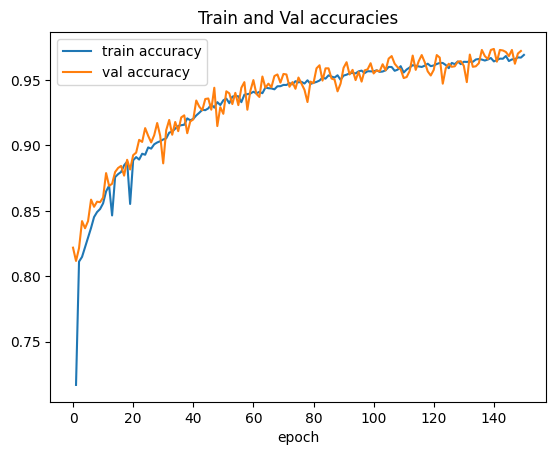

In [ ]:
def plot_history(history):
    epochs = len(history.history['accuracy'])
    plt.plot(range(1, epochs+1), history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.title('Train and Val accuracies')

plot_history(history)

This model performed extremely well, with the following advantages: it does not overfit, is very light (10k params, 50 KB), takes only about 5-7 minutes to train, and produces very good validation accuracy of 97%, matching the validation accuracy of our BERT model. The performance between the BERT and RNN model is extremely similar, but the significantly lower training time of the RNN model makes it our preferred choice of the baseline models implemented.

## Final Model Pipeline Setup

Our baseline models performed very well. We note that we only trained on the text, without taking into account other parameters such as rating or category. For our future models we plan to implement them such that they also take these other features into consideration. Additionally, we want to look into other models such as GPT with fine-tuning as we feel that this model is another intuitive way to get results for our data and believe it would perform quite well. Finally, we were may want to create a separate model for each of the categories of reviews in our data.

## TF Meeting
We were asked to provide the breakdown of contributions from different group members.

The work has been split evenly between all group members. Sofia found the dataset and together with Eliza worked on cleaning it. The EDA comprised mainly of Eliza, Steve, and Vlad with Sofia and Arseniy making a few changes and adding small touches. The logistic regression baseline model was done by Sofia, the BERT model was done by Vlad, and the RNN model (with all architecture tuning) was done by Arseniy, with decisions regarding picking these models and how we would implement them being a group effort. Finally, writeups were done mainly by Eliza, Sofia Steve, with everyone else in the group additionally providing their input and making edits as they saw fit.

For almost all milestones, everyone suggested and implemented their ideas whenever they had free time. We did not know that we would be asked to report such a list of contributions, so every time, the work was more like a shared brainstorm. Overall, it is very fair to say that we had equal contributions.

---

In Milestone 5 we attempted to improve upon the milestone 4 baseline models, specifically BERT and RNN. As a group we would like to include other features like rating and especially category into our models as we feel these might help increase accuracy even more (e.g., train a separate model for each category or even deploy hierarchical models as dicsussed in the beginning of the semester :)

Additionally, as a group we may look into other models such as GPT with fine-tuning.

Finally, given that the baseline models already get good accuracy scores (i.e., up to 97% with Bert), we would like to investigate what kind of features they learn via visualizations (in the latent space) and other methods.

#Part 4: RNN: Final Model

So, how do we nail the RNN design? There are a couple of ideas to consider:  \
1) add the features we did not use yet \
2) improve tokenization \
3) make the LSTM NN deeper \

Here are the results of my attempts to use each of these ideas. When assessing the performance, I trained the model with the EarlyStopping patiance = 20, and then was calculating average val score of the last 20 epochs (to get rid of noise). The val scores of different architectures can be found below: \
1) Added new features -> 95.1% \
2) Improved text tokenization -> 95.7% \
3) Deep LSTM -> 97.1% \
4) Decrease number of features -> 94.7% (intuition: with less vocabulary, we would need less embedding features; not worth it) \
5) Decrease dimension of hidden state -> 94.4% (intuition: with deep LSTM, we would need less states; not worth it) \

\
As we figured out the final design of the model, we should train it with patiance = 50 (to make sure we have reached the limit of the model's capabilities). We got the accuracy of 98.4% which is very high

In [ ]:
# shuffle the dataset
idx = np.random.choice(np.arange(df.shape[0]), size=int(df.shape[0]), replace = False)
reviews, labels = list(df.iloc[idx]['text_']), list((df.iloc[idx]['label'] == 'CG').astype(int))

Nice tokenization: make everything lowercase, merge all the rare symbols

In [ ]:
# creating the set of all the used symbols
chars = set(['']) # '' is going to be the symbol for padding
for text in df['text_']:
    chars.update(set(text.lower()))
counter = {}
for text in reviews:
    text = text.lower()
    for j in text:
        if j not in counter:
            counter[j] = 0
        counter[j] += 1
rare = set()
for key, val in counter.items():
    if val <= 20:
        rare.add(key)
chars = chars - rare
chars.add('|') # this is going to be the "rare" symbol
char2idx = {val: ind for ind, val in enumerate(chars)}
for elem in rare:
    char2idx[elem] = char2idx['|'] # assign the same index for rare elements
print(char2idx)

{'': 0, '$': 1, ':': 2, '%': 3, '~': 4, 'n': 5, 'd': 6, '*': 7, 't': 8, '&': 9, '!': 10, '.': 11, '5': 12, '3': 13, 'f': 14, ']': 15, 'y': 16, ')': 17, '/': 18, 'w': 19, 'o': 20, '4': 21, '7': 22, '8': 23, 'm': 24, 'u': 25, '9': 26, 'h': 27, '_': 28, '(': 29, 'i': 30, '#': 31, ' ': 32, '`': 33, 'x': 34, 'r': 35, 'q': 36, 'k': 37, '>': 38, 'g': 39, ',': 40, '1': 41, 'p': 42, '0': 43, '@': 44, 'l': 45, 'e': 46, '=': 47, ';': 48, 'j': 49, "'": 50, 'c': 51, '|': 52, '?': 53, 's': 54, 'v': 55, 'a': 56, 'z': 57, '-': 58, '\n': 59, '6': 60, '<': 61, '[': 62, 'b': 63, '+': 64, '"': 65, '2': 66, 'í': 52, 'û': 52, '\\': 52, 'ó': 52, '^': 52, '}': 52, '{': 52}


In [ ]:
df_stats = df.drop(['text_', 'label', 'category'], axis=1)
print(df_stats.shape)

(40420, 10)


In [ ]:
# convert the text into encoded sequence of numbers
SEQ_LEN = 300
padding = char2idx['']
x = np.zeros((len(reviews), SEQ_LEN), dtype=int)
counter = {i: 0 for i in char2idx}
for i in range(len(reviews)):
    text = [char2idx[symb] for symb in reviews[i].lower()]
    if len(text) > SEQ_LEN:
        text = text[:SEQ_LEN]
    if len(text) < SEQ_LEN:
        text = [padding] * (SEQ_LEN - len(text)) + text
    x[i] = text
y = np.array(labels)
print(x.shape)
print(y.shape)

(40420, 300)
(40420,)


In [ ]:
x_complete = np.concatenate((x, df_stats), axis=1)
print(df_stats)

       rating  text_length  rating_0  rating_1  rating_2  rating_3  rating_4  \
0         5.0           75       0.0       0.0       0.0       0.0       1.0   
1         5.0           80       0.0       0.0       0.0       0.0       1.0   
2         5.0           67       0.0       0.0       0.0       0.0       1.0   
3         1.0           81       1.0       0.0       0.0       0.0       0.0   
4         5.0           85       0.0       0.0       0.0       0.0       1.0   
...       ...          ...       ...       ...       ...       ...       ...   
40415     4.0         1694       0.0       0.0       0.0       1.0       0.0   
40416     5.0         1304       0.0       0.0       0.0       0.0       1.0   
40417     2.0         1987       0.0       1.0       0.0       0.0       0.0   
40418     1.0         1301       1.0       0.0       0.0       0.0       0.0   
40419     5.0         1768       0.0       0.0       0.0       0.0       1.0   

       CG  text_word_count  text_exclam

In [ ]:
# Create a TensorFlow dataset from tensor slices
dataset = tf.data.Dataset.from_tensor_slices((x_complete, y))

# Shuffle the dataset
dataset = dataset.shuffle(buffer_size=len(x_complete))

# Batch the dataset into smaller chunks
batch_size = 256
dataset = dataset.batch(batch_size)

# Prefetch the dataset to keep the GPU busy while CPU is preparing the next batch
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

val_data = dataset.take(10)
train_data = dataset.skip(10)

In [ ]:
NON_TEXT_FEAT = df_stats.shape[1]

num_feature = 64
h_size = 16

input_combined = Input(shape=(SEQ_LEN + NON_TEXT_FEAT,))
input_main, input_extra = Lambda(lambda x: tf.split(x, [SEQ_LEN, NON_TEXT_FEAT], axis=1))(input_combined)

# Embedding layer
embedding_layer = Embedding(len(chars), num_feature, input_length=SEQ_LEN)(input_main)

# LSTM layer
lstm_temp = LSTM(units=h_size, input_shape=(SEQ_LEN, num_feature), return_sequences=True)(embedding_layer)
lstm_output = LSTM(units=h_size, input_shape=(SEQ_LEN, num_feature), return_sequences=False)(lstm_temp)

# Dense layers for main sequence
dense_output_text = Dense(units=16, activation='relu')(lstm_output)

# Concatenate the dense output with the extra predictor
all_features = Concatenate()([dense_output_text, input_extra])

dense_final = Dense(units=32, activation='relu')(all_features)

# Final dense layer
output = Dense(units=1, activation='sigmoid')(dense_final)

# Define the model
model = Model(inputs=input_combined, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 310)]                0         []                            
                                                                                                  
 lambda (Lambda)             [(None, 300),                0         ['input_1[0][0]']             
                              (None, 10)]                                                         
                                                                                                  
 embedding (Embedding)       (None, 300, 64)              4288      ['lambda[0][0]']              
                                                                                                  
 lstm (LSTM)                 (None, 300, 16)              5184      ['embedding[0][0]']       

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True)
history = model.fit(train_data, epochs=500, validation_data=val_data, callbacks=[early_stopping])

Epoch 1/500
148/148 [==============================] - ETA: 0s - loss: 2.6106 - accuracy: 0.5021

KeyboardInterrupt: 

In [ ]:
def plot_history(history):
    epochs = len(history.history['accuracy'])
    plt.plot(range(1, epochs+1), history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.title('Train and Val accuracies')

plot_history(history)
print(np.mean(history.history['val_accuracy'][-20:]))

# Results

TO DO: comment on accuracy / metrics / results /

# Conclusion
Do overall comment of modeling decisions / final conclusions


# Scope of Improvement